### PP440WT Policy Memo
LSE 2023/2024

Plot 3 variables that represent the state of the economy in the short and long run.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Data:__

In [9]:
# GDP - source Eurostat
gdp = pd.read_csv("/Users/henriquerodrigues/Desktop/LSE/PP440/WT/Data Memo/EuroStat/Real-GDP_Quarter.csv")

In [10]:
# millions of 2010 chained euros
gdp.rename(columns={'CLVMNACSCAB1GQPT': 'real_gdp'}, inplace=True)
gdp["DATE"]=pd.to_datetime(gdp["DATE"])

In [11]:
gdp

DATE  real_gdp
0   1995-01-01   33747.4
1   1995-04-01   34145.4
2   1995-07-01   34293.5
3   1995-10-01   34525.9
4   1996-01-01   34798.6
..         ...       ...
110 2022-07-01   49793.1
111 2022-10-01   50046.3
112 2023-01-01   50783.0
113 2023-04-01   50851.2
114 2023-07-01   50727.0

[115 rows x 2 columns]

In [12]:
# compute growth
gdp_growth = [0]

for i in range(1, len(gdp)):
    gdp_growth.append(100*(gdp.real_gdp[i]-gdp.real_gdp[i-1])/gdp.real_gdp[i-1])

gdp["gdp_growth"] = gdp_growth

In [13]:
gdp

DATE  real_gdp  gdp_growth
0   1995-01-01   33747.4    0.000000
1   1995-04-01   34145.4    1.179350
2   1995-07-01   34293.5    0.433733
3   1995-10-01   34525.9    0.677679
4   1996-01-01   34798.6    0.789842
..         ...       ...         ...
110 2022-07-01   49793.1    0.491224
111 2022-10-01   50046.3    0.508504
112 2023-01-01   50783.0    1.472037
113 2023-04-01   50851.2    0.134297
114 2023-07-01   50727.0   -0.244242

[115 rows x 3 columns]

In [54]:
import numpy as np

In [57]:
gdp["gdp_growth"].sort_values(ascending=False)

102    14.602939
105     4.450598
106     2.982564
108     2.310173
20      2.225497
         ...    
71     -1.580332
104    -2.435436
56     -2.516613
100    -4.379318
101   -15.107541
Name: gdp_growth, Length: 115, dtype: float64

In [14]:
# identify recession periods
gdp['in_recession'] = ((gdp['gdp_growth'] < 0) & (gdp['gdp_growth'].shift(-1) < 0)) | (((gdp['gdp_growth'] < 0) & (gdp['gdp_growth'].shift(1) < 0)))

In [15]:
gdp[gdp["in_recession"]==True]

DATE  real_gdp  gdp_growth  in_recession
29  2002-04-01   43022.4   -0.464105          True
30  2002-07-01   42827.3   -0.453485          True
31  2002-10-01   42507.6   -0.746486          True
53  2008-04-01   45667.8   -0.492658          True
54  2008-07-01   45630.1   -0.082553          True
55  2008-10-01   45040.7   -1.291691          True
56  2009-01-01   43907.2   -2.516613          True
63  2010-10-01   44917.8   -0.193978          True
64  2011-01-01   44621.0   -0.660763          True
65  2011-04-01   44429.6   -0.428946          True
66  2011-07-01   44082.7   -0.780786          True
67  2011-10-01   43431.0   -1.478358          True
68  2012-01-01   43193.9   -0.545923          True
69  2012-04-01   42611.7   -1.347876          True
70  2012-07-01   42130.4   -1.129502          True
71  2012-10-01   41464.6   -1.580332          True
100 2020-01-01   46363.6   -4.379318          True
101 2020-04-01   39359.2  -15.107541          True

In [79]:
num_periods = len(gdp)

# compute the compounded annual growth rate (CAGR) for each quarter
gdp['CAGR'] = (1 + gdp['gdp_growth']/100).pow(4) - 1

# convert CAGR to percentage:
gdp['CAGR'] = gdp['CAGR'] * 100

In [159]:
gdp

DATE  real_gdp  gdp_growth  in_recession  year      CAGR
0   1995-01-01   33747.4    0.000000         False  1995  0.000000
1   1995-04-01   34145.4    1.179350         False  1995  4.801511
2   1995-07-01   34293.5    0.433733         False  1995  1.746254
3   1995-10-01   34525.9    0.677679         False  1995  2.738397
4   1996-01-01   34798.6    0.789842         False  1996  3.196996
..         ...       ...         ...           ...   ...       ...
110 2022-07-01   49793.1    0.491224         False  2022  1.979421
111 2022-10-01   50046.3    0.508504         False  2022  2.049584
112 2023-01-01   50783.0    1.472037         False  2023  6.019442
113 2023-04-01   50851.2    0.134297         False  2023  0.538271
114 2023-07-01   50727.0   -0.244242         False  2023 -0.973395

[115 rows x 6 columns]

In [160]:
gdp["CAGR"].mean()

1.8230601024038204

In [96]:
# av growth rate 1st period
gdp[gdp["DATE"].dt.year<2002]["CAGR"].mean()

3.6020902156116685

In [118]:
# av growth sec period
gdp[(gdp["DATE"].dt.year>=2003) & (gdp["DATE"].dt.year < 2008)]["CAGR"].mean()

1.5661213654679451

In [123]:
#av 3rd period
gdp[(gdp["DATE"].dt.year>=2003) & (gdp["DATE"]>'2009-01-01')]["CAGR"].mean()

1.7305439933494848

In [127]:
# av 4th period
gdp[(gdp["DATE"].dt.year>=2013) & (gdp["DATE"].dt.year < 2020)]["CAGR"].mean()

2.272399627390684

In [138]:
# av now - without covid shock
gdp[gdp["DATE"]>'2022-01-01']["CAGR"].mean()

1.6402162822882225

In [113]:
# 2023/2002
gdp["real_gdp"].iloc[114]/gdp["real_gdp"][31]

1.1933630691923327

In [114]:
import math

# Calculate number of years to get to current GDP from 2002
x = math.log(1.1933630691923327) / math.log(1.036)

In [115]:
x

4.99829532644497

In [153]:
gdp.sort_values(by="CAGR", ascending=False)

DATE  real_gdp  gdp_growth  in_recession  year       CAGR
102 2020-07-01   45106.8   14.602939         False  2020  72.497586
105 2021-04-01   46128.1    4.450598         False  2021  19.026519
106 2021-07-01   47503.9    2.982564         False  2021  12.474688
108 2022-01-01   49521.5    2.310173         False  2022   9.565866
20  2000-01-01   41547.1    2.225497         False  2000   9.203593
..         ...       ...         ...           ...   ...        ...
71  2012-10-01   41464.6   -1.580332          True  2012  -6.173052
104 2021-01-01   44162.6   -2.435436         False  2021  -9.391605
56  2009-01-01   43907.2   -2.516613          True  2009  -9.692786
100 2020-01-01   46363.6   -4.379318          True  2020 -16.399795
101 2020-04-01   39359.2  -15.107541          True  2020 -48.063049

[115 rows x 6 columns]

In [16]:
# Unemployment - Source OECD, World Bank
unemp_quarter = pd.read_csv("/Users/henriquerodrigues/Desktop/LSE/PP440/WT/Data Memo/OECD/Unemployment_Quarter.csv")
unemp_year = pd.read_csv("/Users/henriquerodrigues/Desktop/LSE/PP440/WT/Data Memo/OECD/Unemployment_Year.csv")
youth_unemp_year = pd.read_csv("/Users/henriquerodrigues/Desktop/LSE/PP440/WT/Data Memo/OECD/Youth-Unemployment_Year.csv")

In [17]:
unemp_quarter

DATE  LRUN64TTPTQ156S
0    1998-01-01         5.948345
1    1998-04-01         5.242820
2    1998-07-01         5.134938
3    1998-10-01         5.054001
4    1999-01-01         4.789545
..          ...              ...
98   2022-07-01         6.265536
99   2022-10-01         6.586302
100  2023-01-01         7.040040
101  2023-04-01         6.474732
102  2023-07-01         6.418191

[103 rows x 2 columns]

In [18]:
unemployment_year = pd.merge(unemp_year, youth_unemp_year, on="DATE")
unemployment_year.rename(columns={'LRUN64TTPTQ156S': 'unemp', 'SLUEM1524ZSPRT': 'youth_unemp'}, inplace=True)

In [19]:
unemployment_year["DATE"] = pd.to_datetime(unemployment_year["DATE"])

#identify recession years
unemployment_year["in_recession"] = unemployment_year['DATE'].dt.year.isin([2002, 2008, 2011, 2012, 2020])

In [20]:
unemployment_year["unemp"] = unemployment_year["unemp"].astype(float)

In [21]:
unemployment_year

DATE      unemp  youth_unemp  in_recession
0  1995-01-01   7.064000       15.976         False
1  1995-01-01   7.064000       16.068         False
2  1996-01-01   7.298000       16.971         False
3  1996-01-01   7.298000       17.057         False
4  1997-01-01   6.571000       14.141         False
5  1997-01-01   6.571000       14.142         False
6  1998-01-01   5.345026        9.496         False
7  1999-01-01   4.756872        9.176         False
8  2000-01-01   4.254207        8.252         False
9  2001-01-01   4.250933        8.967         False
10 2002-01-01   5.306694       10.454          True
11 2003-01-01   6.652944       13.493         False
12 2004-01-01   7.019259       14.052         False
13 2005-01-01   8.047289       16.222         False
14 2006-01-01   8.129638       16.508         False
15 2007-01-01   8.466338       16.750         False
16 2008-01-01   8.023458       16.653          True
17 2009-01-01  11.436672       20.306         False
18 2010-01-01  12.875085       22.756         False
19 2011-01-01  13.698029       30.265          True
20 2012-01-01  16.810283       37.920          True
21 2013-01-01  17.420944       38.106         False
22 2014-01-01  14.784594       34.761         False
23 2015-01-01  13.148581       31.964         False
24 2016-01-01  11.661713       27.956         False
25 2017-01-01   9.289170       23.873         False
26 2018-01-01   7.333046       20.282         False
27 2019-01-01   6.757197       18.256         False
28 2020-01-01   7.123002       22.554          True
29 2021-01-01   6.864836       23.421         False
30 2022-01-01   6.312010       19.002         False

In [220]:
dates = ["1995-01-01", "1995-02-01", "1995-03-01", "1995-04-01", "1995-05-01", "1995-06-01", "1995-07-01", "1995-08-01", "1995-09-01", "1995-10-01", "1995-11-01", "1995-12-01", "1996-01-01", "1996-02-01", "1996-03-01", "1996-04-01", "1996-05-01", "1996-06-01", "1996-07-01", "1996-08-01", "1996-09-01", "1996-10-01", "1996-11-01", "1996-12-01", "1997-01-01", "1997-02-01", "1997-03-01", "1997-04-01", "1997-05-01", "1997-06-01", "1997-07-01", "1997-08-01", "1997-09-01", "1997-10-01", "1997-11-01", "1997-12-01", "1998-01-01", "1998-02-01", "1998-03-01", "1998-04-01", "1998-05-01", "1998-06-01", "1998-07-01", "1998-08-01", "1998-09-01", "1998-10-01", "1998-11-01", "1998-12-01", "1999-01-01", "1999-02-01", "1999-03-01", "1999-04-01", "1999-05-01", "1999-06-01", "1999-07-01", "1999-08-01", "1999-09-01", "1999-10-01", "1999-11-01", "1999-12-01", "2000-01-01", "2000-02-01", "2000-03-01", "2000-04-01", "2000-05-01", "2000-06-01", "2000-07-01", "2000-08-01", "2000-09-01", "2000-10-01", "2000-11-01", "2000-12-01", "2001-01-01", "2001-02-01", "2001-03-01", "2001-04-01", "2001-05-01", "2001-06-01", "2001-07-01", "2001-08-01", "2001-09-01", "2001-10-01", "2001-11-01", "2001-12-01", "2002-01-01", "2002-02-01", "2002-03-01", "2002-04-01", "2002-05-01", "2002-06-01", "2002-07-01", "2002-08-01", "2002-09-01", "2002-10-01", "2002-11-01", "2002-12-01", "2003-01-01", "2003-02-01", "2003-03-01", "2003-04-01", "2003-05-01", "2003-06-01", "2003-07-01", "2003-08-01", "2003-09-01", "2003-10-01", "2003-11-01", "2003-12-01", "2004-01-01", "2004-02-01", "2004-03-01", "2004-04-01", "2004-05-01", "2004-06-01", "2004-07-01", "2004-08-01", "2004-09-01", "2004-10-01", "2004-11-01", "2004-12-01", "2005-01-01", "2005-02-01", "2005-03-01", "2005-04-01", "2005-05-01", "2005-06-01", "2005-07-01", "2005-08-01", "2005-09-01", "2005-10-01", "2005-11-01", "2005-12-01", "2006-01-01", "2006-02-01", "2006-03-01", "2006-04-01", "2006-05-01", "2006-06-01", "2006-07-01", "2006-08-01", "2006-09-01", "2006-10-01", "2006-11-01", "2006-12-01", "2007-01-01", "2007-02-01", "2007-03-01", "2007-04-01", "2007-05-01", "2007-06-01", "2007-07-01", "2007-08-01", "2007-09-01", "2007-10-01", "2007-11-01", "2007-12-01", "2008-01-01", "2008-02-01", "2008-03-01", "2008-04-01", "2008-05-01", "2008-06-01", "2008-07-01", "2008-08-01", "2008-09-01", "2008-10-01", "2008-11-01", "2008-12-01", "2009-01-01", "2009-02-01", "2009-03-01", "2009-04-01", "2009-05-01", "2009-06-01", "2009-07-01", "2009-08-01", "2009-09-01", "2009-10-01", "2009-11-01", "2009-12-01", "2010-01-01", "2010-02-01", "2010-03-01", "2010-04-01", "2010-05-01", "2010-06-01", "2010-07-01", "2010-08-01", "2010-09-01", "2010-10-01", "2010-11-01", "2010-12-01", "2011-01-01", "2011-02-01", "2011-03-01", "2011-04-01", "2011-05-01", "2011-06-01", "2011-07-01", "2011-08-01", "2011-09-01", "2011-10-01", "2011-11-01", "2011-12-01", "2012-01-01", "2012-02-01", "2012-03-01", "2012-04-01", "2012-05-01", "2012-06-01", "2012-07-01", "2012-08-01", "2012-09-01", "2012-10-01", "2012-11-01", "2012-12-01", "2013-01-01", "2013-02-01", "2013-03-01", "2013-04-01", "2013-05-01", "2013-06-01", "2013-07-01", "2013-08-01", "2013-09-01", "2013-10-01", "2013-11-01", "2013-12-01", "2014-01-01", "2014-02-01", "2014-03-01", "2014-04-01", "2014-05-01", "2014-06-01", "2014-07-01", "2014-08-01", "2014-09-01", "2014-10-01", "2014-11-01", "2014-12-01", "2015-01-01", "2015-02-01", "2015-03-01", "2015-04-01", "2015-05-01", "2015-06-01", "2015-07-01", "2015-08-01", "2015-09-01", "2015-10-01", "2015-11-01", "2015-12-01", "2016-01-01", "2016-02-01", "2016-03-01", "2016-04-01", "2016-05-01", "2016-06-01", "2016-07-01", "2016-08-01", "2016-09-01", "2016-10-01", "2016-11-01", "2016-12-01", "2017-01-01", "2017-02-01", "2017-03-01", "2017-04-01", "2017-05-01", "2017-06-01", "2017-07-01", "2017-08-01", "2017-09-01", "2017-10-01", "2017-11-01", "2017-12-01", "2018-01-01", "2018-02-01", "2018-03-01", "2018-04-01", "2018-05-01", "2018-06-01", "2018-07-01", "2018-08-01", "2018-09-01", "2018-10-01", "2018-11-01", "2018-12-01", "2019-01-01", "2019-02-01", "2019-03-01", "2019-04-01", "2019-05-01", "2019-06-01", "2019-07-01", "2019-08-01", "2019-09-01", "2019-10-01", "2019-11-01", "2019-12-01", "2020-01-01", "2020-02-01", "2020-03-01", "2020-04-01", "2020-05-01", "2020-06-01", "2020-07-01", "2020-08-01", "2020-09-01", "2020-10-01", "2020-11-01", "2020-12-01", "2021-01-01", "2021-02-01", "2021-03-01", "2021-04-01", "2021-05-01", "2021-06-01", "2021-07-01", "2021-08-01", "2021-09-01", "2021-10-01", "2021-11-01", "2021-12-01", "2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01", "2022-05-01", "2022-06-01", "2022-07-01", "2022-08-01", "2022-09-01", "2022-10-01", "2022-11-01", "2022-12-01", "2023-01-01", "2023-02-01", "2023-03-01", "2023-04-01", "2023-05-01", "2023-06-01", "2023-07-01", "2023-08-01", "2023-09-01", "2023-10-01", "2023-11-01", "2023-12-01"]

In [228]:
infl = "-0,41 -0,31 -0,18 1,09 0,32	-0,36 0,25 -0,67 0,56 1,74 0,26	-0,85 -0,3 0,26	1,24 1,23 -0,31	-0,04 0,83 0,98	2,2	2,51 0,37 0,28 0,01	0,44 0,45 0,91 -0,2 -0,35 0,15 0,24	0,42 1,41 -0,46	-0,3 -0,14 -0,3	0,11 0,97 -0,27	-1,29 0,89 -0,45 0,32 1,43 -0,64 -0,83 -0,13 -0,15 0,04	1,1	-0,12 -1,31	0,03 0,06 0,58 1,77	-0,22 -1,2 -0,23 -0,45 -0,09 1,13 -0,35	-0,61 0,06 0,41	0,66 1,86 -0,68	-1,02 -0,04	-0,35 0,34 0,95 0,01 -0,67 -0,4 -0,24 0,95 1,75	-0,23 -0,59 0,04 -0,5 0,34 0,69	-0,22 -0,66	0,13 0,28 0,35 1,94	-0,45 -1,04	-0,26 -0,2	0,09 0,79 -0,34	-0,72 -0,08	0,43 0,32 1,89 -0,07 -1,41 -0,02 -0,21	0,33 0,57 -0,23	-0,69 0,07 -0,13 0,24 1,36 -0,26 -1,38 0,36	-0,22 -0,05	0,59 -0,74 -0,24 0,05 0,17 0,01	1,65 -0,12 -1,24 0,01 -0,32	0,31 0,62 -0,14	-0,01 -0,22	-0,35 0,28 1,17	0,08 0,48 -0,02	-0,08 1,05 0,82	-0,44 -0,07	-0,23 -0,05	0,42 1,61 0	0,57 0,29 0,18 0,43	0,18 -0,2 0,17 0,19 0,14 0,41 1,16 0,03	-0,48 0,07 0,24	0,06 0,19 -0,29	-0,53 0,08 -0,2	0,25 0,79 -0,05	-0,64 -0,48	-0,64 -0,15	0,53 -0,5 -0,58	0,5	0,44 0,31 1,48 0,01	-0,13 0,11 0,35	0,55 0,45 -0,47	-0,29 -0,05	0,15 0,91 1,25 -0,02 -0,27 0,22	0,13 0,07 0,42 -0,15 -0,23 -0,05 0,43 0,52 1,26	0,21 -0,34 0,1 0,42	0,47 0,19 0,11 0,3 0,02	0,42 0,68 0,34 -0,04 -0,45 0,08	0,55 0,64 -0,08	-0,35 -0,19	0,22 0,65 0,85 0,23	-0,15 0,01 0,06	0,28 0,54 0,19 0,05	-0,29 -0,01	0,56 0,77 0,07 -0,02 0,15 0,14 0,73	0,65 -0,06 0,07	0,17 0,32 0,66 0,81	0,43 -0,17 0,16	0,2	0,67 0,39 -0,04	-0,19 0,11 0,26	0,84 0,57 0,44 0,12	0,37 0,37 0,79 0,41	-0,09 0,04 0,33	0,5	0,56 1,17 0,15 -0,23 -0,2 0,25 0,58	0,28 -0,02 -0,16 -0,02 0,15	0,12 0,64 0,43 0,03	-0,33 0,35 0,49	0,36 -0,12 0,02	0,21 0,13 0,62 0,72	0,27 -0,04 0,14	0,24 0,4 -0,05 -0,06 0,48 0,03 -0,26 0,61 0,16 0,13	0,17 0,61 0,05 0,19	-0,06 -0,01	0,29 0,15 -0,05	0,38 0,8 0,35 0,59 0,47	-0,1 0,07 0,34 0,14 0,42 0,03 -0,21	-0,08 0,43 0,47	0,57 1,43"

In [229]:
infl = infl.replace(',', '.')

In [230]:
len(infl)

1843

In [231]:
def reverse_words(sentence):
    words = sentence.split()
    reversed_words = words[::-1]
    reversed_sentence = ', '.join(reversed_words[:-1])
    
    return reversed_sentence

reversed_infl = reverse_words(infl)

In [235]:
reversed_infl

'1.43, 0.57, 0.47, 0.43, -0.08, -0.21, 0.03, 0.42, 0.14, 0.34, 0.07, -0.1, 0.47, 0.59, 0.35, 0.8, 0.38, -0.05, 0.15, 0.29, -0.01, -0.06, 0.19, 0.05, 0.61, 0.17, 0.13, 0.16, 0.61, -0.26, 0.03, 0.48, -0.06, -0.05, 0.4, 0.24, 0.14, -0.04, 0.27, 0.72, 0.62, 0.13, 0.21, 0.02, -0.12, 0.36, 0.49, 0.35, -0.33, 0.03, 0.43, 0.64, 0.12, 0.15, -0.02, -0.16, -0.02, 0.28, 0.58, 0.25, -0.2, -0.23, 0.15, 1.17, 0.56, 0.5, 0.33, 0.04, -0.09, 0.41, 0.79, 0.37, 0.37, 0.12, 0.44, 0.57, 0.84, 0.26, 0.11, -0.19, -0.04, 0.39, 0.67, 0.2, 0.16, -0.17, 0.43, 0.81, 0.66, 0.32, 0.17, 0.07, -0.06, 0.65, 0.73, 0.14, 0.15, -0.02, 0.07, 0.77, 0.56, -0.01, -0.29, 0.05, 0.19, 0.54, 0.28, 0.06, 0.01, -0.15, 0.23, 0.85, 0.65, 0.22, -0.19, -0.35, -0.08, 0.64, 0.55, 0.08, -0.45, -0.04, 0.34, 0.68, 0.42, 0.02, 0.3, 0.11, 0.19, 0.47, 0.42, 0.1, -0.34, 0.21, 1.26, 0.52, 0.43, -0.05, -0.23, -0.15, 0.42, 0.07, 0.13, 0.22, -0.27, -0.02, 1.25, 0.91, 0.15, -0.05, -0.29, -0.47, 0.45, 0.55, 0.35, 0.11, -0.13, 0.01, 1.48, 0.31, 0.44, 

In [233]:
len(reversed_infl)

2183

In [292]:
infl = [1.43,0.57,0.47,0.43,-0.08,-0.21,0.03,0.42,0.14,0.34,0.07,-0.1,0.47,0.59,0.35,0.8,0.38,-0.05,0.15,0.29,-0.01,-0.06,0.19,0.05,0.61,0.17,0.13,0.16,0.61,-0.26,0.03,0.48,-0.06,-0.05,0.4,0.24,0.14,-0.04,0.27,0.72,0.62,0.13,0.21,0.02,-0.12,0.36,0.49,0.35,-0.33,0.03,0.43,0.64,0.12,0.15,-0.02,-0.16,-0.02,0.28,0.58,0.25,-0.2,-0.23,0.15,1.17,0.56,0.5,0.33,0.04,-0.09,0.41,0.79,0.37,0.37,0.12,0.44,0.57,0.84,0.26,0.11,-0.19,-0.04,0.39,0.67,0.2,0.16,-0.17,0.43,0.81,0.66,0.32,0.17,0.07,-0.06,0.65,0.73,0.14,0.15,-0.02,0.07,0.77,0.56,-0.01,-0.29,0.05,0.19,0.54,0.28,0.06,0.01,-0.15,0.23,0.85,0.65,0.22,-0.19,-0.35,-0.08,0.64,0.55,0.08,-0.45,-0.04,0.34,0.68,0.42,0.02,0.3,0.11,0.19,0.47,0.42,0.1,-0.34,0.21,1.26,0.52,0.43,-0.05,-0.23,-0.15,0.42,0.07,0.13,0.22,-0.27,-0.02,1.25,0.91,0.15,-0.05,-0.29,-0.47,0.45,0.55,0.35,0.11,-0.13,0.01,1.48,0.31,0.44,0.5,-0.58,-0.5,0.53,-0.15,-0.64,-0.48,-0.64,-0.05,0.79,0.25,-0.2,0.08,-0.53,-0.29,0.19,0.06,0.24,0.07,-0.48,0.03,1.16,0.41,0.14,0.19,0.17,-0.2,0.18,0.43,0.18,0.29,0.57,0,1.61,0.42,-0.05,-0.23,-0.07,-0.44,0.82,1.05,-0.08,-0.02,0.48,0.08,1.17,0.28,-0.35,-0.22,-0.01,-0.14,0.62,0.31,-0.32,0.01,-1.24,-0.12,1.65,0.01,0.17,0.05,-0.24,-0.74,0.59,-0.05,-0.22,0.36,-1.38,-0.26,1.36,0.24,-0.13,0.07,-0.69,-0.23,0.57,0.33,-0.21,-0.02,-1.41,-0.07,1.89,0.32,0.43,-0.08,-0.72,-0.34,0.79,0.09,-0.2,-0.26,-1.04,-0.45,1.94,0.35,0.28,0.13,-0.66,-0.22,0.69,0.34,-0.5,0.04,-0.59,-0.23,1.75,0.95,-0.24,-0.4,-0.67,0.01,0.95,0.34,-0.35,-0.04,-1.02,-0.68,1.86,0.66,0.41,0.06,-0.61,-0.35,1.13,-0.09,-0.45,-0.23,-1.2,-0.22,1.77,0.58,0.06,0.03,-1.31,-0.12,1.1,0.04,-0.15,-0.13,-0.83,-0.64,1.43,0.32,-0.45,0.89,-1.29,-0.27,0.97,0.11,-0.3,-0.14,-0.3,-0.46,1.41,0.42,0.24,0.15,-0.35,-0.2,0.91,0.45,0.44,0.01,0.28,0.37,2.51,2.2,0.98,0.83,-0.04,-0.31,1.23,1.24,0.26,-0.3,-0.85,0.26,1.74,0.56,-0.67,0.25,-0.36,0.32,1.09,-0.18,-0.31]

In [293]:
# Inflation - Source Statistics Portugal
infl_month = pd.DataFrame({"DATE": pd.to_datetime(["1995-02-01", "1995-03-01", "1995-04-01", "1995-05-01", "1995-06-01", "1995-07-01", "1995-08-01", "1995-09-01", "1995-10-01", "1995-11-01", "1995-12-01", "1996-01-01", "1996-02-01", "1996-03-01", "1996-04-01", "1996-05-01", "1996-06-01", "1996-07-01", "1996-08-01", "1996-09-01", "1996-10-01", "1996-11-01", "1996-12-01", "1997-01-01", "1997-02-01", "1997-03-01", "1997-04-01", "1997-05-01", "1997-06-01", "1997-07-01", "1997-08-01", "1997-09-01", "1997-10-01", "1997-11-01", "1997-12-01", "1998-01-01", "1998-02-01", "1998-03-01", "1998-04-01", "1998-05-01", "1998-06-01", "1998-07-01", "1998-08-01", "1998-09-01", "1998-10-01", "1998-11-01", "1998-12-01", "1999-01-01", "1999-02-01", "1999-03-01", "1999-04-01", "1999-05-01", "1999-06-01", "1999-07-01", "1999-08-01", "1999-09-01", "1999-10-01", "1999-11-01", "1999-12-01", "2000-01-01", "2000-02-01", "2000-03-01", "2000-04-01", "2000-05-01", "2000-06-01", "2000-07-01", "2000-08-01", "2000-09-01", "2000-10-01", "2000-11-01", "2000-12-01", "2001-01-01", "2001-02-01", "2001-03-01", "2001-04-01", "2001-05-01", "2001-06-01", "2001-07-01", "2001-08-01", "2001-09-01", "2001-10-01", "2001-11-01", "2001-12-01", "2002-01-01", "2002-02-01", "2002-03-01", "2002-04-01", "2002-05-01", "2002-06-01", "2002-07-01", "2002-08-01", "2002-09-01", "2002-10-01", "2002-11-01", "2002-12-01", "2003-01-01", "2003-02-01", "2003-03-01", "2003-04-01", "2003-05-01", "2003-06-01", "2003-07-01", "2003-08-01", "2003-09-01", "2003-10-01", "2003-11-01", "2003-12-01", "2004-01-01", "2004-02-01", "2004-03-01", "2004-04-01", "2004-05-01", "2004-06-01", "2004-07-01", "2004-08-01", "2004-09-01", "2004-10-01", "2004-11-01", "2004-12-01", "2005-01-01", "2005-02-01", "2005-03-01", "2005-04-01", "2005-05-01", "2005-06-01", "2005-07-01", "2005-08-01", "2005-09-01", "2005-10-01", "2005-11-01", "2005-12-01", "2006-01-01", "2006-02-01", "2006-03-01", "2006-04-01", "2006-05-01", "2006-06-01", "2006-07-01", "2006-08-01", "2006-09-01", "2006-10-01", "2006-11-01", "2006-12-01", "2007-01-01", "2007-02-01", "2007-03-01", "2007-04-01", "2007-05-01", "2007-06-01", "2007-07-01", "2007-08-01", "2007-09-01", "2007-10-01", "2007-11-01", "2007-12-01", "2008-01-01", "2008-02-01", "2008-03-01", "2008-04-01", "2008-05-01", "2008-06-01", "2008-07-01", "2008-08-01", "2008-09-01", "2008-10-01", "2008-11-01", "2008-12-01", "2009-01-01", "2009-02-01", "2009-03-01", "2009-04-01", "2009-05-01", "2009-06-01", "2009-07-01", "2009-08-01", "2009-09-01", "2009-10-01", "2009-11-01", "2009-12-01", "2010-01-01", "2010-02-01", "2010-03-01", "2010-04-01", "2010-05-01", "2010-06-01", "2010-07-01", "2010-08-01", "2010-09-01", "2010-10-01", "2010-11-01", "2010-12-01", "2011-01-01", "2011-02-01", "2011-03-01", "2011-04-01", "2011-05-01", "2011-06-01", "2011-07-01", "2011-08-01", "2011-09-01", "2011-10-01", "2011-11-01", "2011-12-01", "2012-01-01", "2012-02-01", "2012-03-01", "2012-04-01", "2012-05-01", "2012-06-01", "2012-07-01", "2012-08-01", "2012-09-01", "2012-10-01", "2012-11-01", "2012-12-01", "2013-01-01", "2013-02-01", "2013-03-01", "2013-04-01", "2013-05-01", "2013-06-01", "2013-07-01", "2013-08-01", "2013-09-01", "2013-10-01", "2013-11-01", "2013-12-01", "2014-01-01", "2014-02-01", "2014-03-01", "2014-04-01", "2014-05-01", "2014-06-01", "2014-07-01", "2014-08-01", "2014-09-01", "2014-10-01", "2014-11-01", "2014-12-01", "2015-01-01", "2015-02-01", "2015-03-01", "2015-04-01", "2015-05-01", "2015-06-01", "2015-07-01", "2015-08-01", "2015-09-01", "2015-10-01", "2015-11-01", "2015-12-01", "2016-01-01", "2016-02-01", "2016-03-01", "2016-04-01", "2016-05-01", "2016-06-01", "2016-07-01", "2016-08-01", "2016-09-01", "2016-10-01", "2016-11-01", "2016-12-01", "2017-01-01", "2017-02-01", "2017-03-01", "2017-04-01", "2017-05-01", "2017-06-01", "2017-07-01", "2017-08-01", "2017-09-01", "2017-10-01", "2017-11-01", "2017-12-01", "2018-01-01", "2018-02-01", "2018-03-01", "2018-04-01", "2018-05-01", "2018-06-01", "2018-07-01", "2018-08-01", "2018-09-01", "2018-10-01", "2018-11-01", "2018-12-01", "2019-01-01", "2019-02-01", "2019-03-01", "2019-04-01", "2019-05-01", "2019-06-01", "2019-07-01", "2019-08-01", "2019-09-01", "2019-10-01", "2019-11-01", "2019-12-01", "2020-01-01", "2020-02-01", "2020-03-01", "2020-04-01", "2020-05-01", "2020-06-01", "2020-07-01", "2020-08-01", "2020-09-01", "2020-10-01", "2020-11-01", "2020-12-01", "2021-01-01", "2021-02-01", "2021-03-01", "2021-04-01", "2021-05-01", "2021-06-01", "2021-07-01", "2021-08-01", "2021-09-01", "2021-10-01", "2021-11-01", "2021-12-01", "2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01", "2022-05-01", "2022-06-01", "2022-07-01", "2022-08-01", "2022-09-01", "2022-10-01", "2022-11-01", "2022-12-01", "2023-01-01", "2023-02-01", "2023-03-01", "2023-04-01", "2023-05-01", "2023-06-01", "2023-07-01", "2023-08-01", "2023-09-01", "2023-10-01", "2023-11-01", "2023-12-01"]),
                            "inflation": infl})

In [294]:
infl_month["DATE"] = pd.to_datetime(infl_month["DATE"])

In [295]:
infl_month

DATE  inflation
0   1995-02-01       1.43
1   1995-03-01       0.57
2   1995-04-01       0.47
3   1995-05-01       0.43
4   1995-06-01      -0.08
..         ...        ...
342 2023-08-01      -0.36
343 2023-09-01       0.32
344 2023-10-01       1.09
345 2023-11-01      -0.18
346 2023-12-01      -0.31

[347 rows x 2 columns]

In [296]:
infl_month.set_index('DATE', inplace=True)

quarterly_average = infl_month.resample('Q').sum()

quarterly_average.reset_index(inplace=True)

In [297]:
quarterly_average

DATE  inflation
0   1995-03-31       2.00
1   1995-06-30       0.82
2   1995-09-30       0.24
3   1995-12-31       0.55
4   1996-03-31       0.96
..         ...        ...
111 2022-12-31       2.73
112 2023-03-31      -0.89
113 2023-06-30       1.63
114 2023-09-30       0.21
115 2023-12-31       0.60

[116 rows x 2 columns]

In [22]:
# Inflation - Source OECD
inflation_month = pd.read_csv("/Users/henriquerodrigues/Desktop/LSE/PP440/WT/Data Memo/OECD/CPI-Inflation.csv")

In [23]:
inflation_month.rename(columns={'PRTCPALTT01CTGYM': 'infl'}, inplace=True)
inflation_month["DATE"] = pd.to_datetime(inflation_month["DATE"])

In [24]:
inflation_month

DATE      infl
0   2010-01-01  0.115746
1   2010-02-01  0.202571
2   2010-03-01  0.566414
3   2010-04-01  0.723978
4   2010-05-01  1.058953
..         ...       ...
163 2023-08-01  3.715874
164 2023-09-01  3.576141
165 2023-10-01  2.117376
166 2023-11-01  1.540686
167 2023-12-01  1.421941

[168 rows x 2 columns]

__Plots:__

In [29]:
gdp["year"] = gdp["DATE"].dt.year

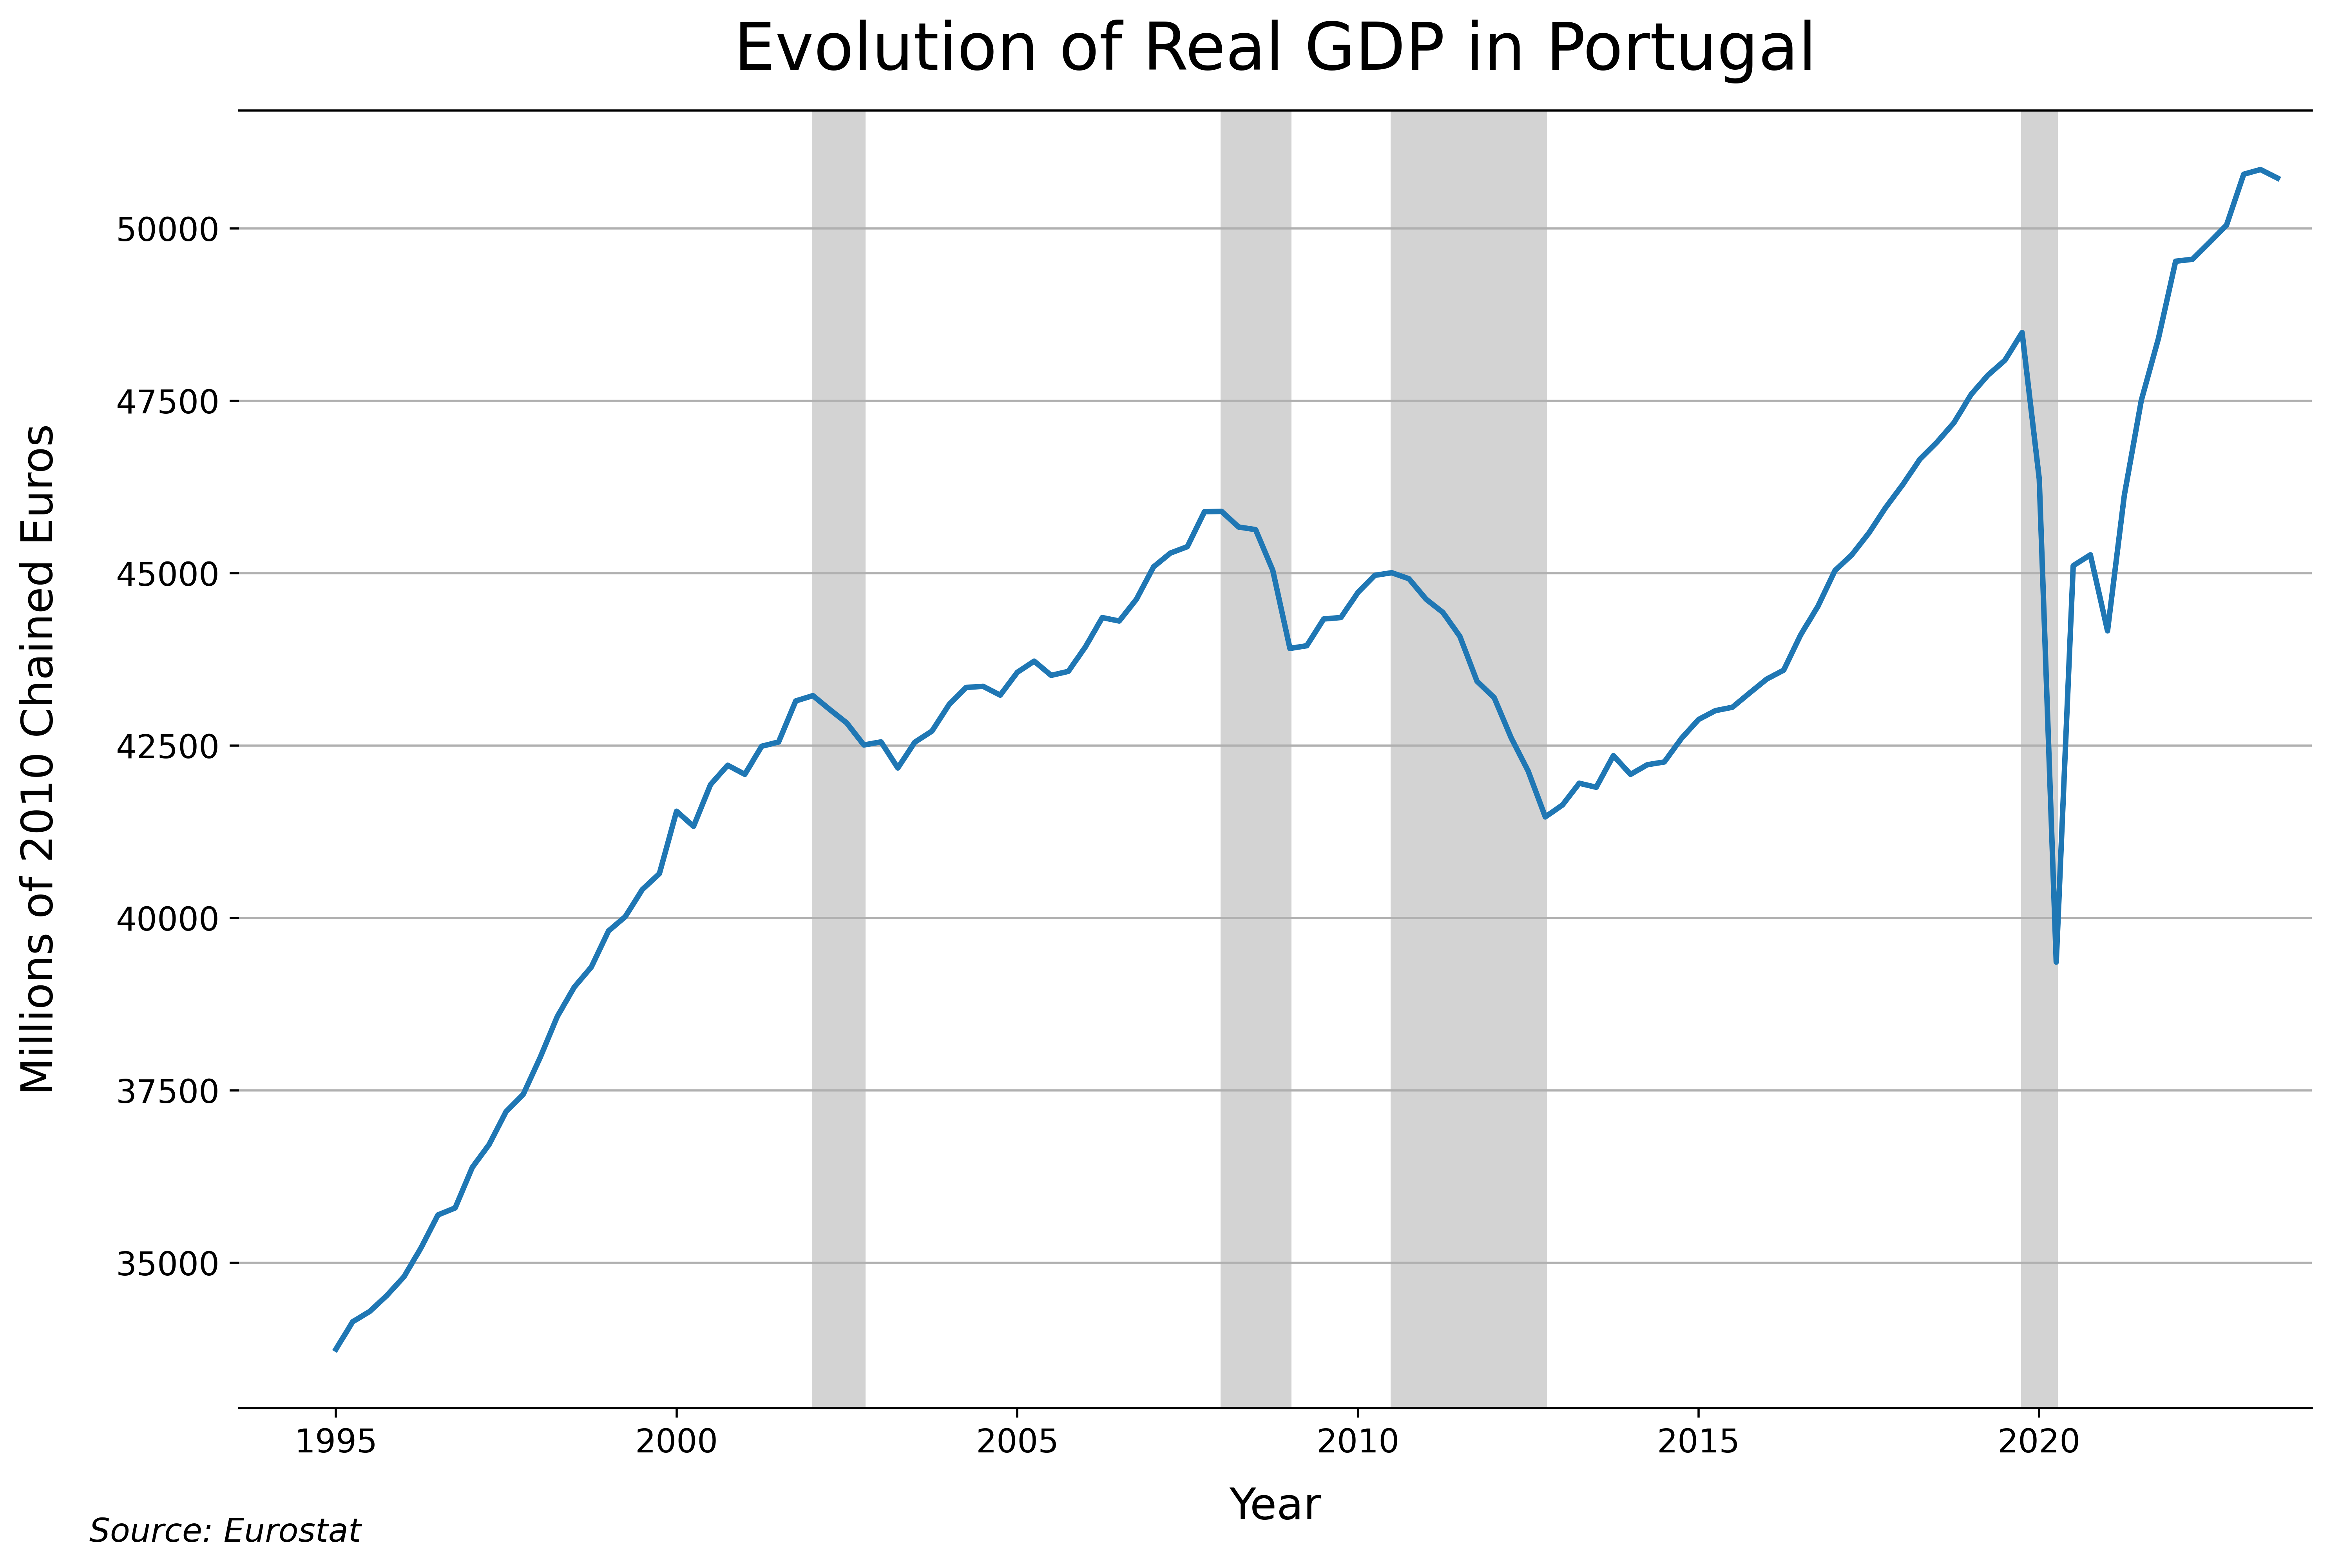

In [30]:
plt.figure(figsize=(12, 8), dpi=500)
plt.plot(gdp['DATE'], gdp['real_gdp'], linewidth=2)

for index, row in gdp.iterrows():
    if row['in_recession']:
        plt.axvspan(row['DATE'], gdp.loc[index-1, 'DATE'], color='lightgrey')

plt.title('Evolution of Real GDP in Portugal', fontsize=24, pad=15, ha='center')
plt.xlabel('Year', fontsize=16, labelpad=10)
plt.ylabel('Millions of 2010 Chained Euros', fontsize=16, labelpad=20)

plt.xticks(gdp['DATE'][::20], gdp['year'][::20],ha='center', fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(right=gdp['DATE'].iloc[-1] + pd.DateOffset(months=6))

plt.figtext(0.1, 0.01, 'Source: Eurostat', ha='center', fontsize=12, style='italic')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [86]:
gdp_2020 = gdp[gdp["DATE"].dt.year>=2020]

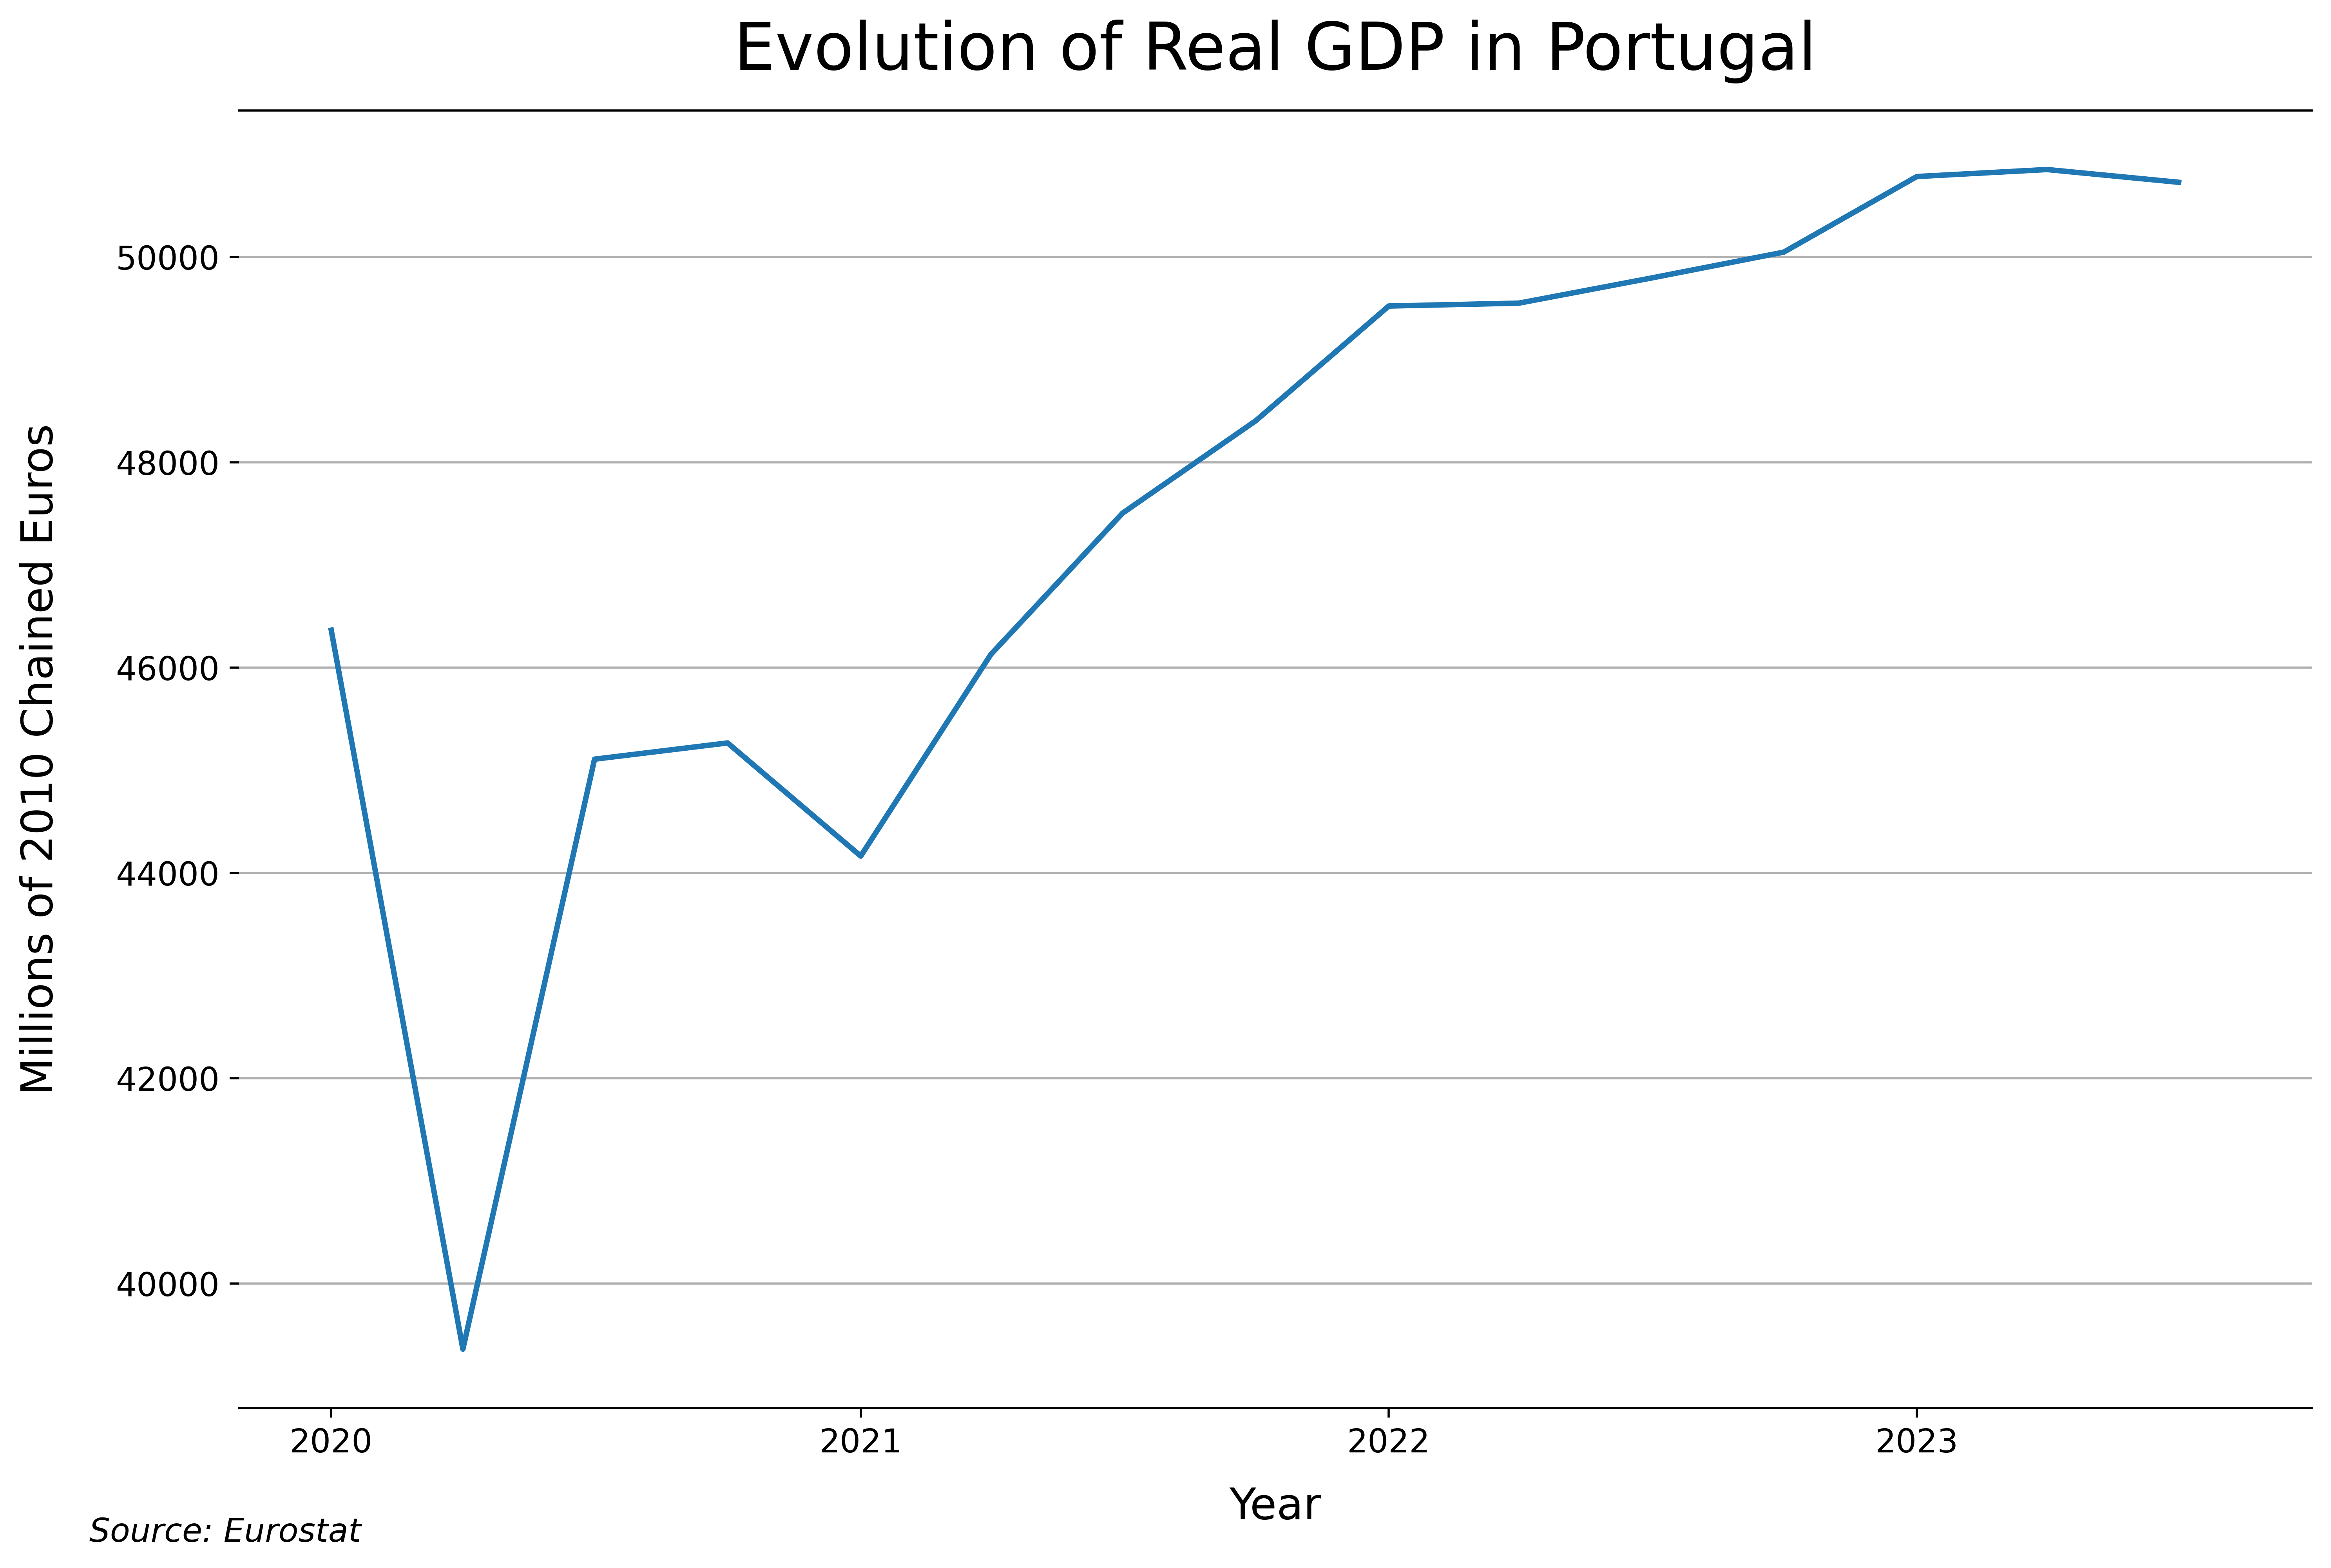

In [59]:
plt.figure(figsize=(12, 8), dpi=500)
plt.plot(gdp_2020['DATE'], gdp_2020['real_gdp'], linewidth=2)

plt.title('Evolution of Real GDP in Portugal', fontsize=24, pad=15, ha='center')
plt.xlabel('Year', fontsize=16, labelpad=10)
plt.ylabel('Millions of 2010 Chained Euros', fontsize=16, labelpad=20)

plt.xticks(gdp_2020['DATE'][::4], gdp_2020['year'][::4],ha='center', fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(right=gdp_2020['DATE'].iloc[-1] + pd.DateOffset(months=3))

plt.figtext(0.1, 0.01, 'Source: Eurostat', ha='center', fontsize=12, style='italic')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [81]:
pre_cov = gdp[gdp["DATE"].dt.year < 2020]

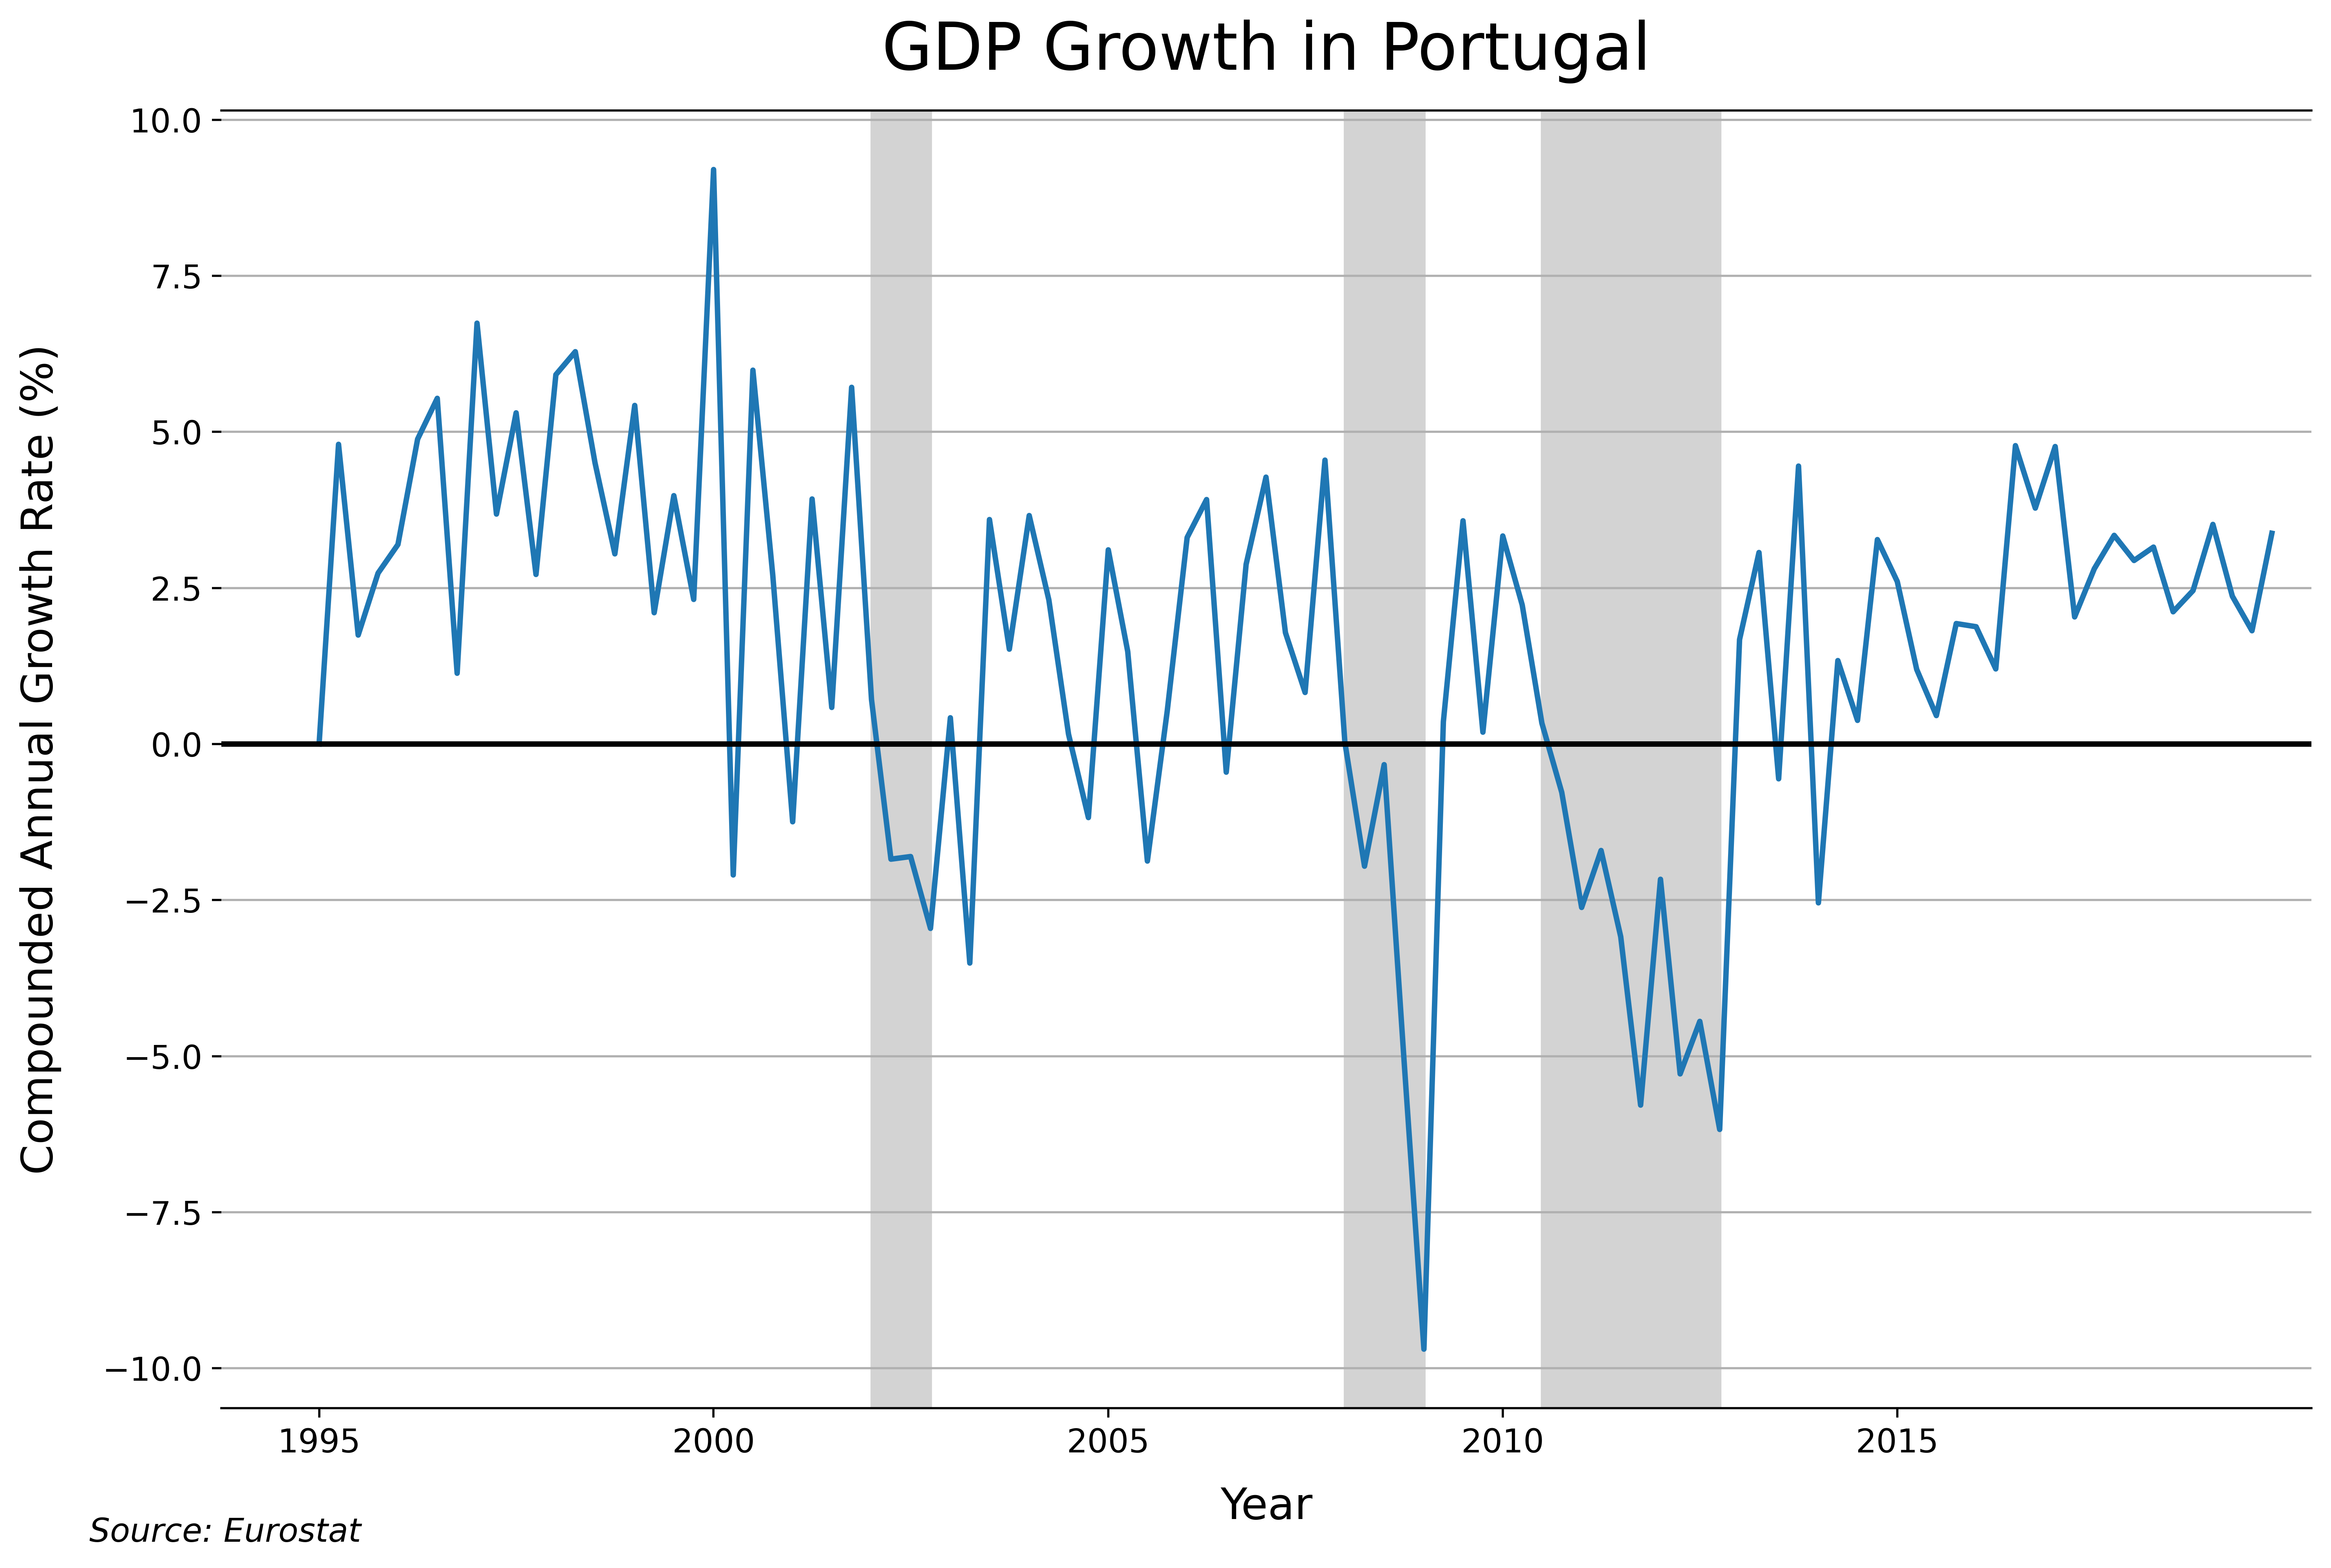

In [162]:
plt.figure(figsize=(12, 8), dpi=500)
plt.plot(pre_cov['DATE'], pre_cov['CAGR'], linewidth=2)

plt.title('GDP Growth in Portugal', fontsize=24, pad=15, ha='center')
plt.xlabel('Year', fontsize=16, labelpad=10)
plt.ylabel('Compounded Annual Growth Rate (%)', fontsize=16, labelpad=15)

for index, row in pre_cov.iterrows():
    if row['in_recession']:
        plt.axvspan(row['DATE'], pre_cov.loc[index-1, 'DATE'], color='lightgrey')

plt.xticks(pre_cov['DATE'][::20], pre_cov['year'][::20],ha='center', fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(right=pre_cov['DATE'].iloc[-1] + pd.DateOffset(months=6))

plt.figtext(0.1, 0.01, 'Source: Eurostat', ha='center', fontsize=12, style='italic')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='y')
plt.axhline(y=0, color='black', linewidth=2)

plt.tight_layout()
plt.show()

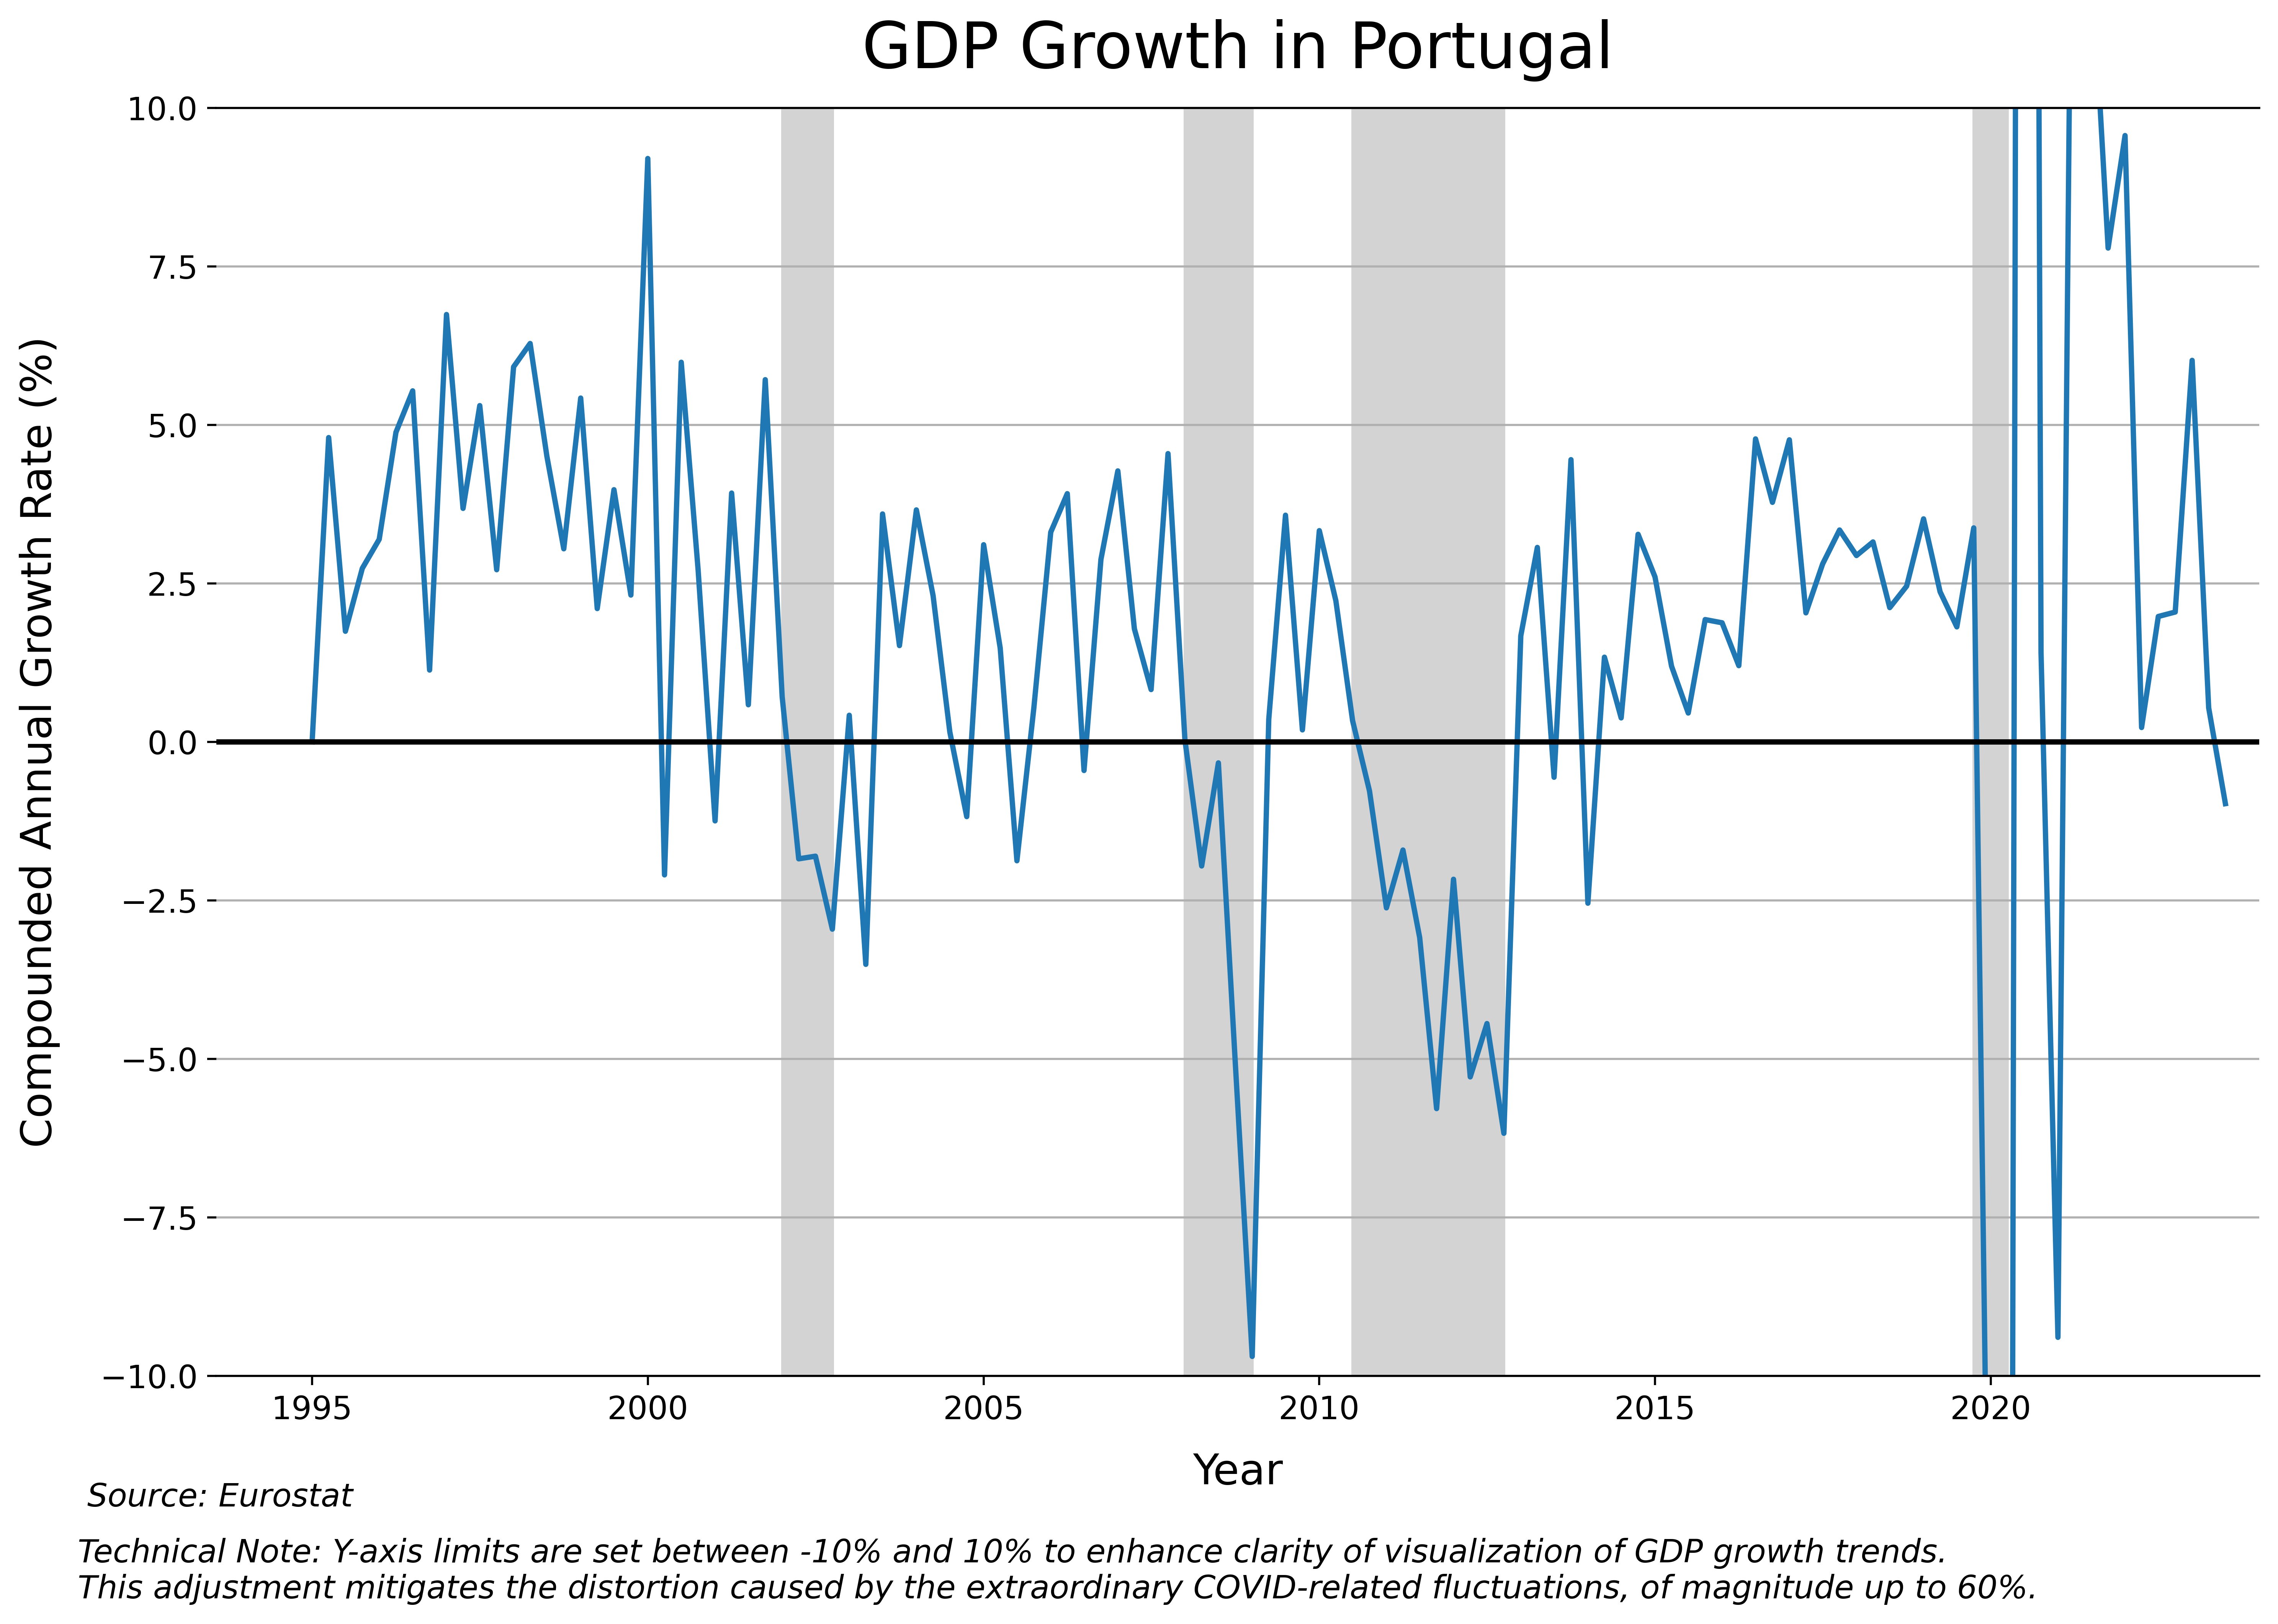

In [326]:
plt.figure(figsize=(12, 8), dpi=500)
plt.plot(gdp['DATE'], gdp['CAGR'], linewidth=2)

plt.title('GDP Growth in Portugal', fontsize=24, pad=15, ha='center')
plt.xlabel('Year', fontsize=16, labelpad=10)
plt.ylabel('Compounded Annual Growth Rate (%)', fontsize=16, labelpad=15)

for index, row in gdp.iterrows():
    if row['in_recession']:
        plt.axvspan(row['DATE'], gdp.loc[index-1, 'DATE'], color='lightgrey')

plt.xticks(gdp['DATE'][::20], gdp['year'][::20],ha='center', fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(right=gdp['DATE'].iloc[-1] + pd.DateOffset(months=6))

plt.figtext(0.1, 0.01, 'Source: Eurostat', ha='center', fontsize=12, style='italic')
plt.figtext(0.038, -0.05, 'Technical Note: Y-axis limits are set between -10% and 10% to enhance clarity of visualization of GDP growth trends. \nThis adjustment mitigates the distortion caused by the extraordinary COVID-related fluctuations, of magnitude up to 60%.',
 ha='left', fontsize=12, style='italic')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='y')
plt.axhline(y=0, color='black', linewidth=2)
plt.ylim(-10, 10)

plt.tight_layout()
plt.show()


In [31]:
unemployment_year["year"] = unemployment_year["DATE"].dt.year

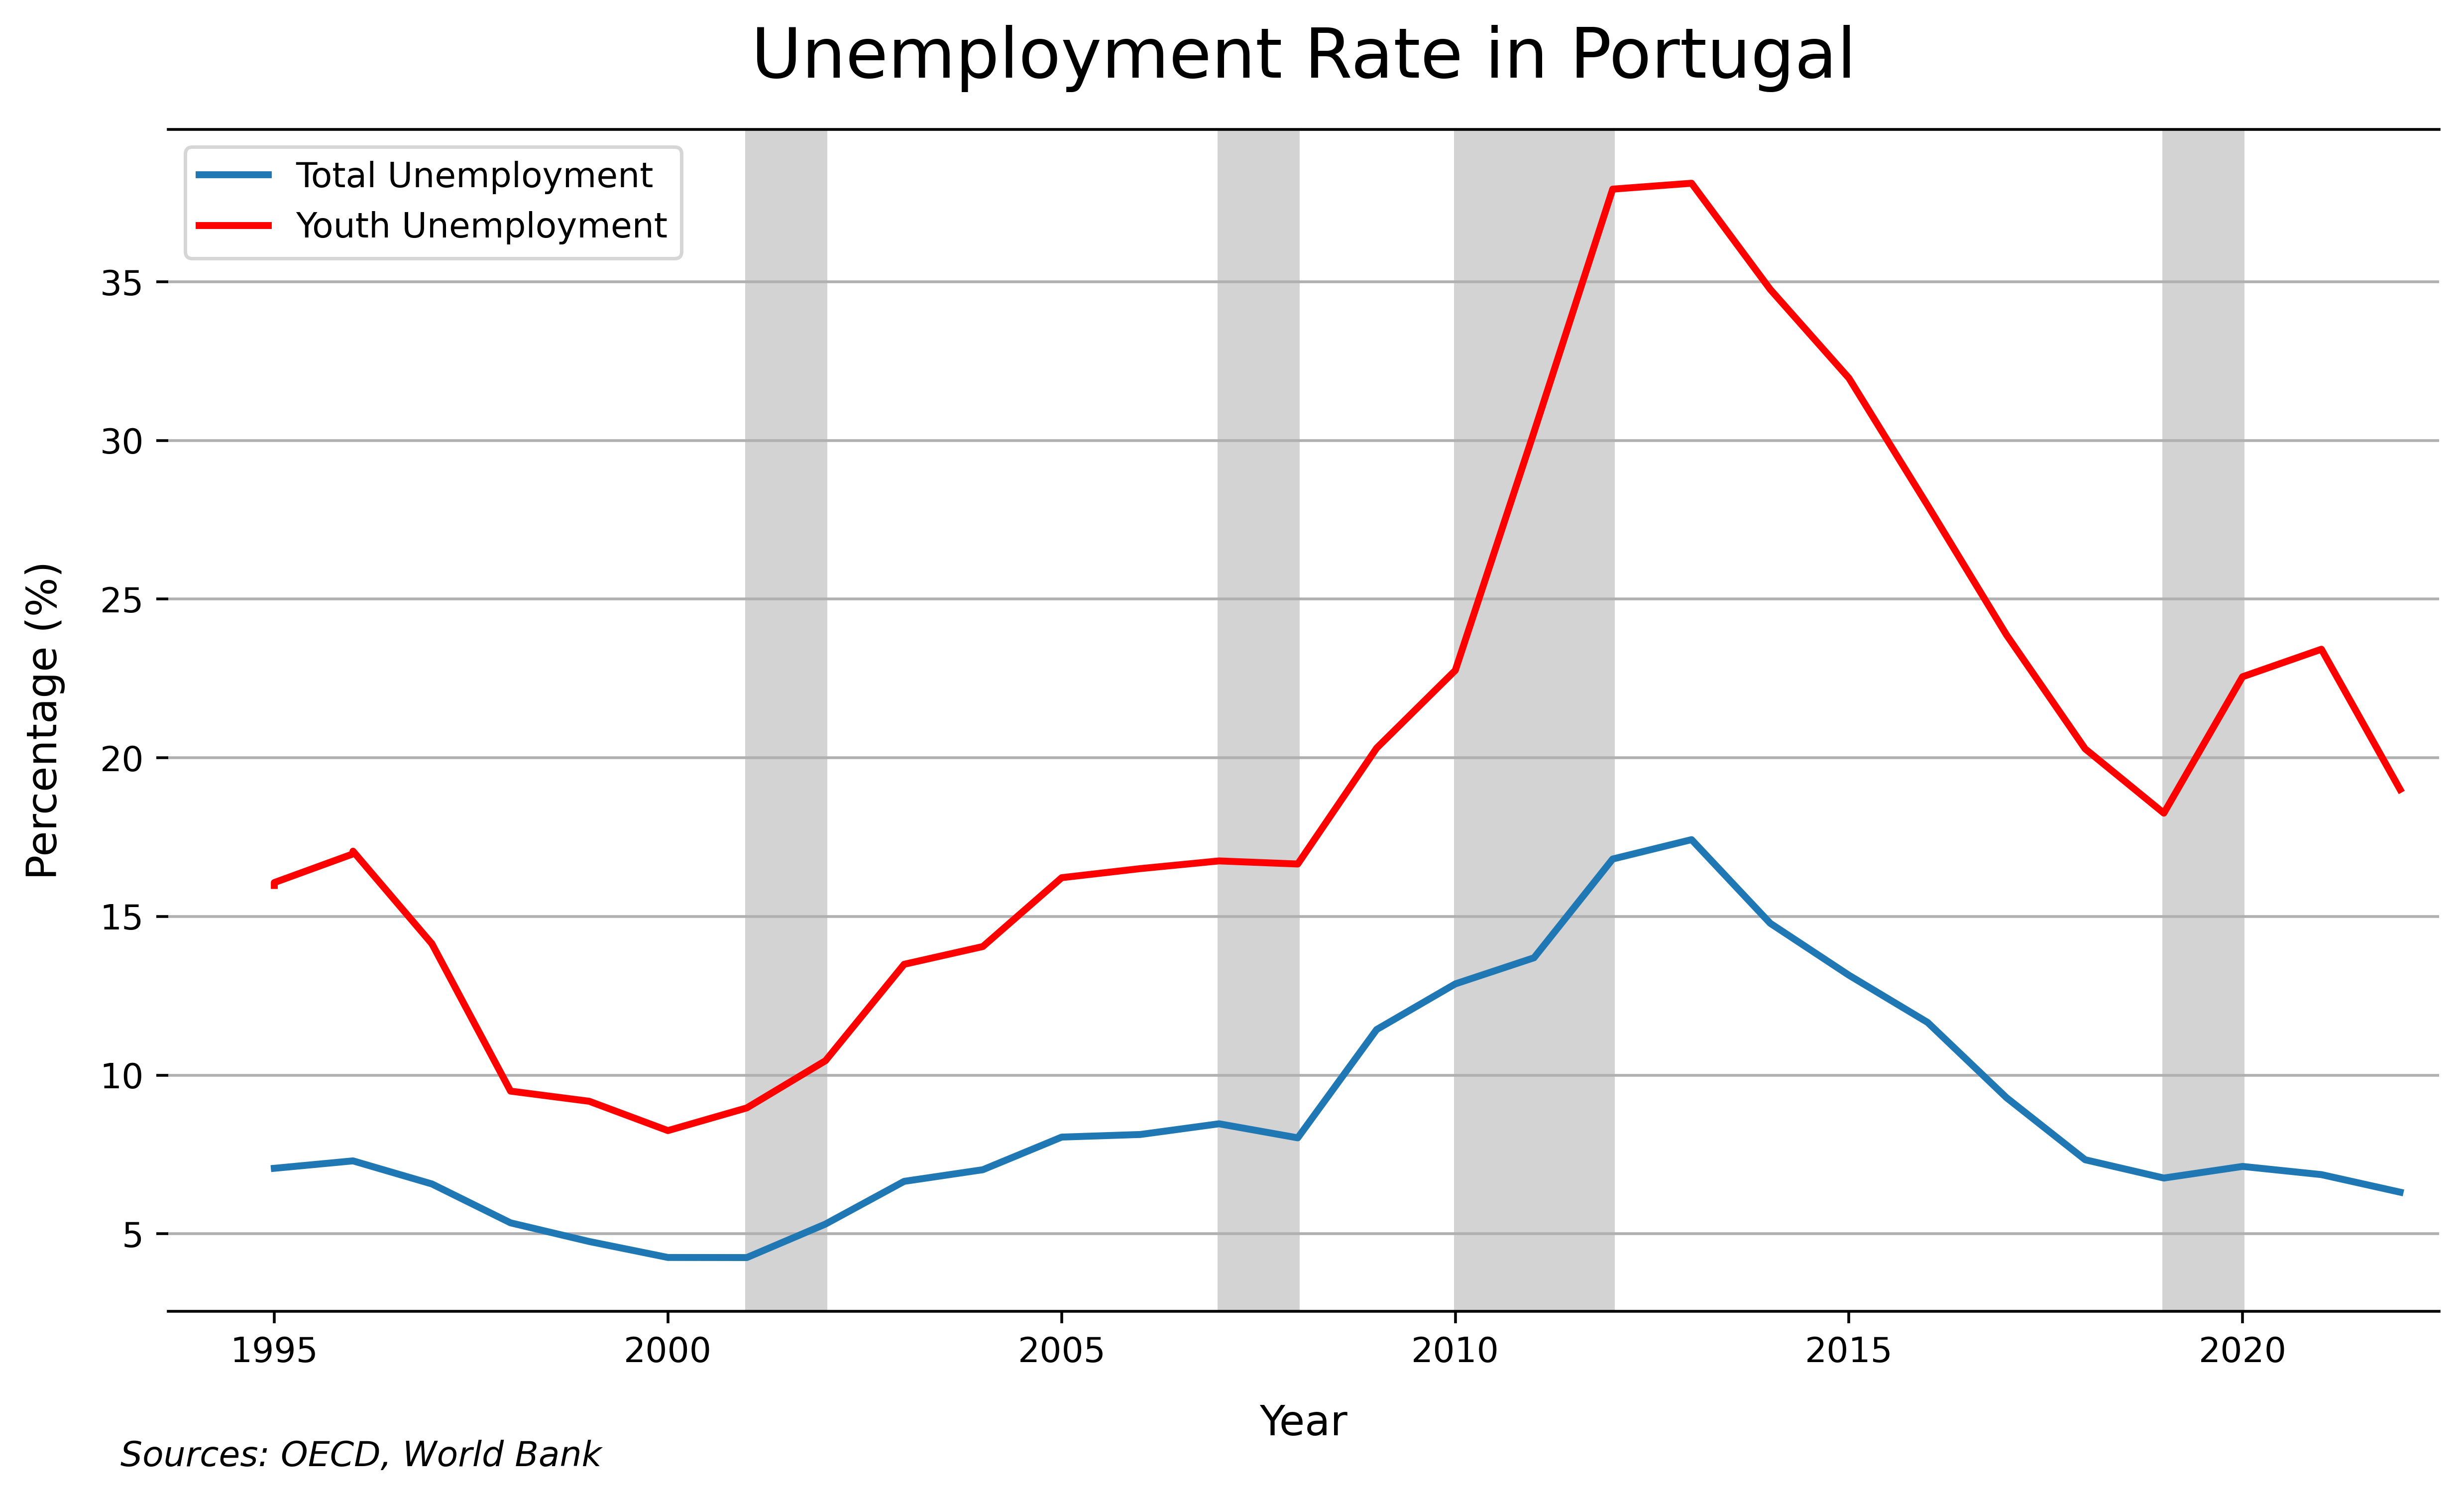

In [32]:
plt.figure(figsize=(10, 6), dpi=500)

plt.title('Unemployment Rate in Portugal', ha='center', fontsize=20, pad=15)

plt.plot(unemployment_year["DATE"], unemployment_year["unemp"], linewidth=2, label='Total Unemployment')
plt.plot(unemployment_year["DATE"], unemployment_year["youth_unemp"], color = "red", linewidth= 2, label="Youth Unemployment")

for index, row in unemployment_year.iterrows():
    if row['in_recession']:
        plt.axvspan(row['DATE'], unemployment_year.loc[index-1, 'DATE'], color='lightgrey')

plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Percentage (%)', fontsize=12, labelpad=10)

plt.xticks(gdp['DATE'][::20], gdp['year'][::20],ha='center', fontsize=10)
plt.yticks(fontsize=10)

plt.xlim(right=unemployment_year['DATE'].iloc[-1] + pd.DateOffset(months=6))

plt.legend(fontsize=10, loc="upper left")

plt.figtext(0.15, 0.01, 'Sources: OECD, World Bank', ha='center', fontsize=10, style='italic')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [298]:
quarterly_average["year"] = quarterly_average["DATE"].dt.year
quarterly_average["year_month"] = quarterly_average["DATE"].dt.strftime('%Y-%m')

quarterly_average["in_recession"] = quarterly_average['year_month'].isin(["2002-01", "2002-02", "2002-03", "2002-04", "2002-05", "2002-06", "2002-07", "2002-08", "2002-09", "2002-10", "2002-11", "2002-12", 
                                                            "2008-01", "2008-02", "2008-03", "2008-04", "2008-05", "2008-06", "2008-07", "2008-08", "2008-09", "2008-10", "2008-11", "2008-12",
                                                            '2009-01', '2009-02','2009-03','2020-01', 
                                                            "2011-01", "2011-02", "2011-03", "2011-04", "2011-05", "2011-06", "2011-07", "2011-08", "2011-09", "2011-10", "2011-11", "2011-12",
                                                            "2012-01", "2012-02", "2012-03", "2012-04", "2012-05", "2012-06", "2012-07", "2012-08", "2012-09", "2012-10", "2012-11", "2012-12",
                                                            "2020-02", '2020-03', '2020-04', '2020-05', '2020-06'])

In [304]:
quarterly_average.tail(20)

DATE  inflation  year year_month  in_recession
96  2019-03-31      -1.65  2019    2019-03         False
97  2019-06-30       2.41  2019    2019-06         False
98  2019-09-30      -1.40  2019    2019-09         False
99  2019-12-31       0.99  2019    2019-12         False
100 2020-03-31      -1.60  2020    2020-03          True
101 2020-06-30       1.30  2020    2020-06          True
102 2020-09-30      -0.67  2020    2020-09         False
103 2020-12-31       0.78  2020    2020-12         False
104 2021-03-31      -0.90  2021    2021-03         False
105 2021-06-30       2.07  2021    2021-06         False
106 2021-09-30      -0.40  2021    2021-09         False
107 2021-12-31       1.80  2021    2021-12         False
108 2022-03-31       0.66  2022    2022-03         False
109 2022-06-30       5.69  2022    2022-06         False
110 2022-09-30       0.48  2022    2022-09         False
111 2022-12-31       2.73  2022    2022-12         False
112 2023-03-31      -0.89  2023    2023-03         False
113 2023-06-30       1.63  2023    2023-06         False
114 2023-09-30       0.21  2023    2023-09         False
115 2023-12-31       0.60  2023    2023-12         False

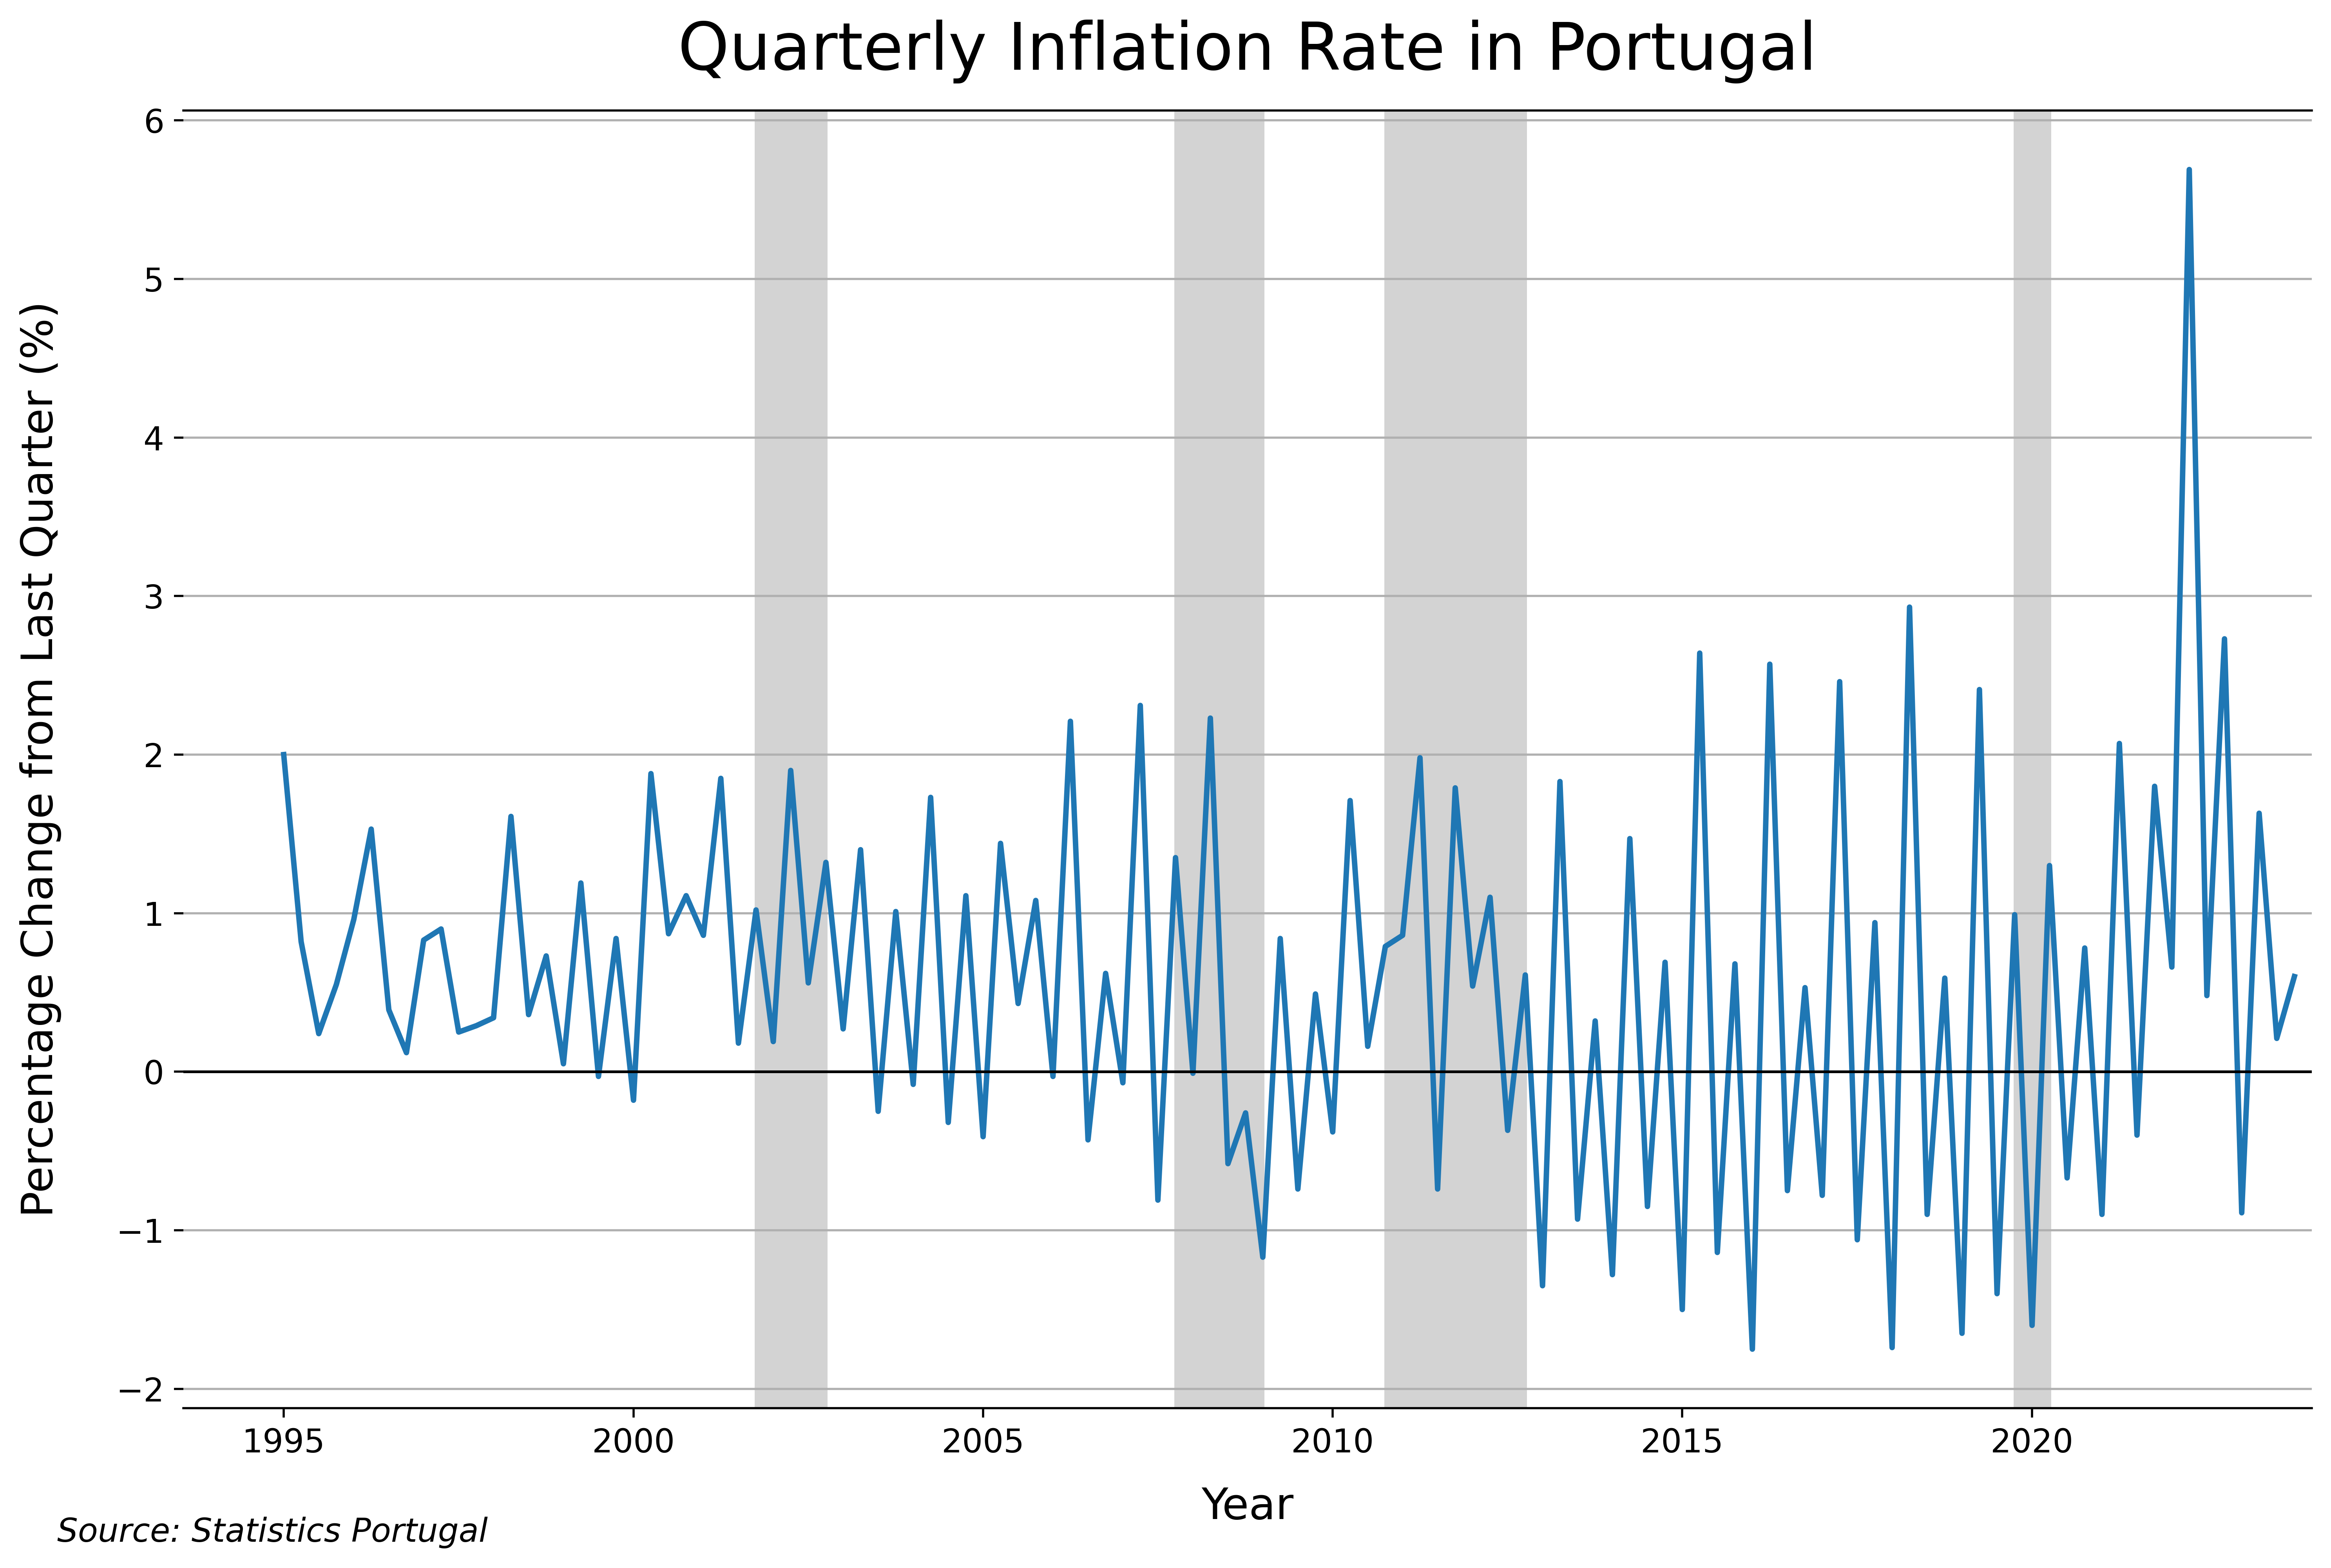

In [311]:
plt.figure(figsize=(12, 8), dpi=500)
plt.plot(quarterly_average['DATE'], quarterly_average['inflation'], linewidth=2)

for index, row in quarterly_average.iterrows():
    if row['in_recession']:
        plt.axvspan(row['DATE'], quarterly_average.loc[index-1, 'DATE'], color='lightgrey')

plt.title('Quarterly Inflation Rate in Portugal', fontsize=24, pad=15, ha='center')
plt.xlabel('Year', fontsize=16, labelpad=10)
plt.ylabel('Percentage Change from Last Quarter (%)', fontsize=16, labelpad=20)

plt.xticks(quarterly_average['DATE'][::20], quarterly_average['year'][::20], ha='center', fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(right=quarterly_average['DATE'].iloc[-1] + pd.DateOffset(months=3))

plt.figtext(0.12, 0.01, 'Source: Statistics Portugal', ha='center', fontsize=12, style='italic')

plt.axhline(y=0, color='black', linewidth=1)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [253]:
infl_month["year"] = infl_month["DATE"].dt.year
infl_month["year_month"] = infl_month["DATE"].dt.strftime('%Y-%m')

infl_month["in_recession"] = infl_month['year_month'].isin(["2002-01", "2002-02", "2002-03", "2002-04", "2002-05", "2002-06", "2002-07", "2002-08", "2002-09", "2002-10", "2002-11", "2002-12", 
                                                            "2008-01", "2008-02", "2008-03", "2008-04", "2008-05", "2008-06", "2008-07", "2008-08", "2008-09", "2008-10", "2008-11", "2008-12",
                                                            '2009-01', '2009-02','2009-03','2020-01', 
                                                            "2011-01", "2011-02", "2011-03", "2011-04", "2011-05", "2011-06", "2011-07", "2011-08", "2011-09", "2011-10", "2011-11", "2011-12",
                                                            "2012-01", "2012-02", "2012-03", "2012-04", "2012-05", "2012-06", "2012-07", "2012-08", "2012-09", "2012-10", "2012-11", "2012-12",
                                                            "2020-02", '2020-03', '2020-04', '2020-05', '2020-06'])

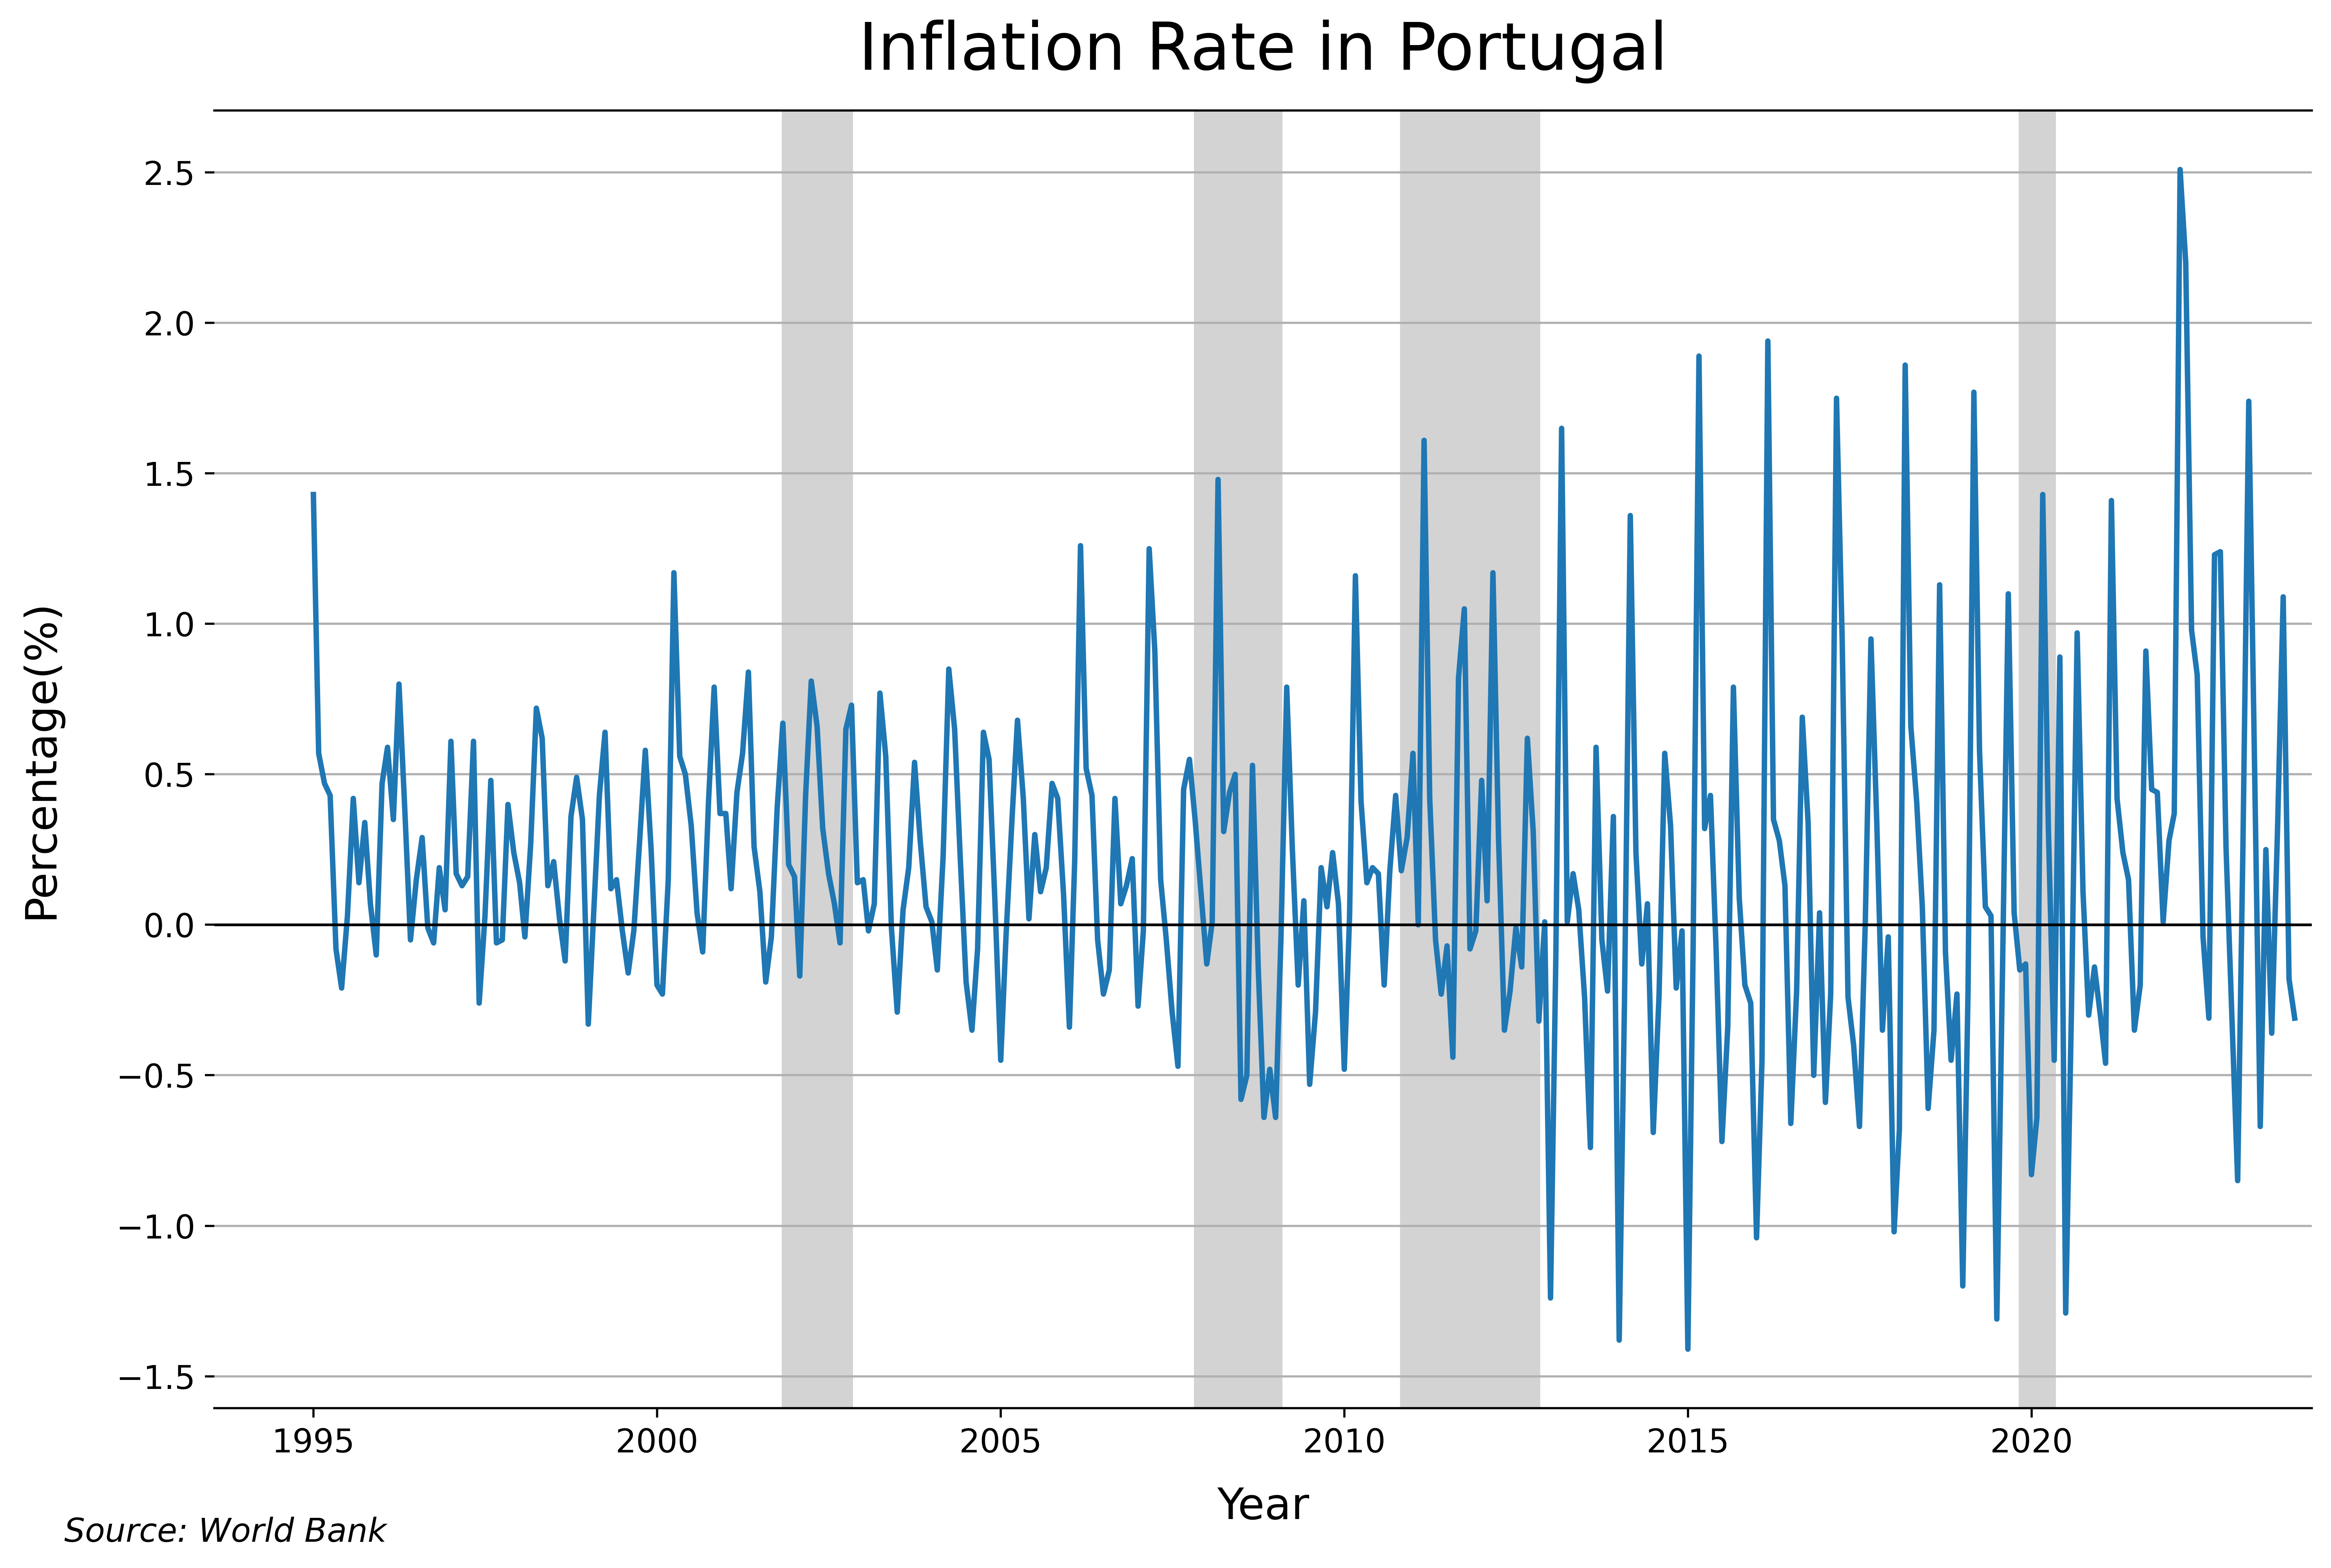

In [255]:
plt.figure(figsize=(12, 8), dpi=500)
plt.plot(infl_month['DATE'], infl_month['inflation'], linewidth=2)

for index, row in infl_month.iterrows():
    if row['in_recession']:
        plt.axvspan(row['DATE'], infl_month.loc[index-1, 'DATE'], color='lightgrey')

plt.title('Inflation Rate in Portugal', fontsize=24, pad=15, ha='center')
plt.xlabel('Year', fontsize=16, labelpad=10)
plt.ylabel('Percentage(%)', fontsize=16, labelpad=20)

plt.xticks(infl_month['DATE'][::60], infl_month['year'][::60], ha='center', fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(right=infl_month['DATE'].iloc[-1] + pd.DateOffset(months=3))

plt.figtext(0.1, 0.01, 'Source: World Bank', ha='center', fontsize=12, style='italic')

plt.axhline(y=0, color='black', linewidth=1)  # Inserting horizontal black line at y=0

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

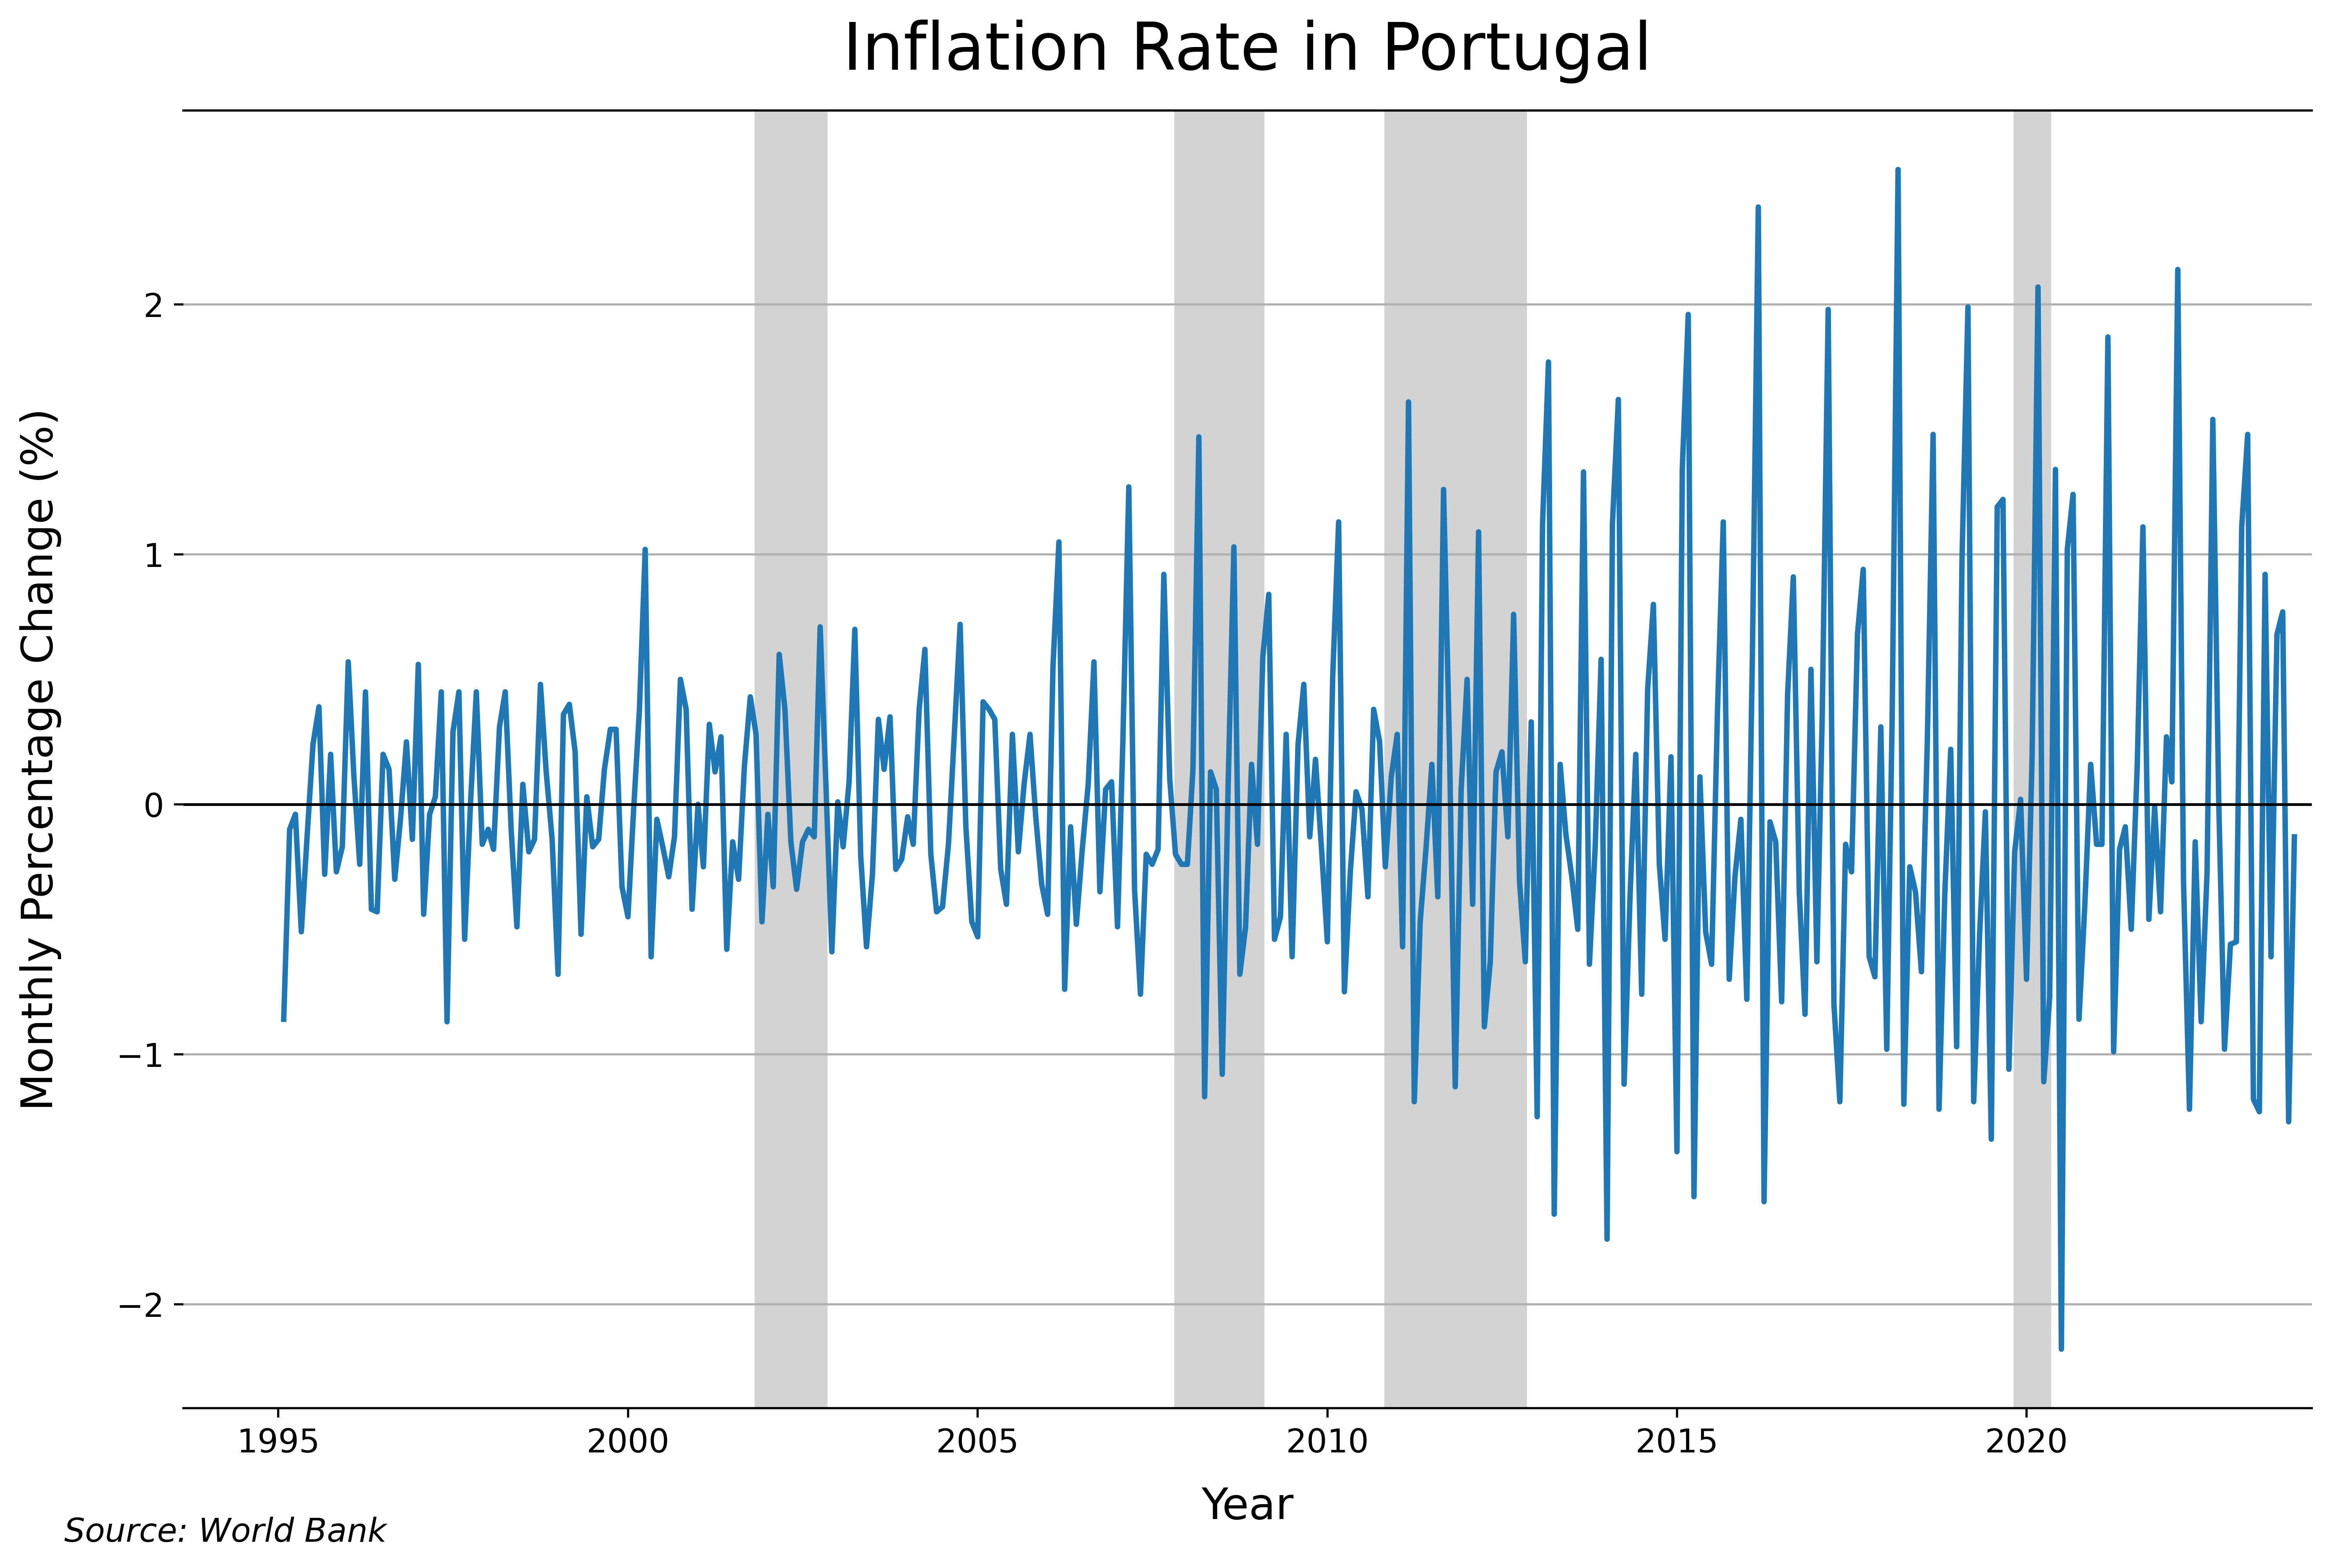

In [258]:
infl_month['inflation'] = infl_month['inflation'].diff(1)

plt.figure(figsize=(12, 8), dpi=500)
plt.plot(infl_month['DATE'], infl_month['inflation'], linewidth=2)

for index, row in infl_month.iterrows():
    if row['in_recession']:
        plt.axvspan(row['DATE'], infl_month.loc[index-1, 'DATE'], color='lightgrey')

plt.title('Inflation Rate in Portugal', fontsize=24, pad=15, ha='center')
plt.xlabel('Year', fontsize=16, labelpad=10)
plt.ylabel('Monthly Percentage Change (%)', fontsize=16, labelpad=20)

plt.xticks(infl_month['DATE'][::60], infl_month['year'][::60], ha='center', fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(right=infl_month['DATE'].iloc[-1] + pd.DateOffset(months=3))

plt.figtext(0.1, 0.01, 'Source: World Bank', ha='center', fontsize=12, style='italic')

plt.axhline(y=0, color='black', linewidth=1)  # Inserting horizontal black line at y=0

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [35]:
inflation_month["year"] = inflation_month["DATE"].dt.year
inflation_month["year_month"] = inflation_month["DATE"].dt.strftime('%Y-%m')

inflation_month = inflation_month[inflation_month["year"]>=2020]
inflation_month["in_recession"] = inflation_month['year_month'].isin(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'])

/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_31996/3607718755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_month["in_recession"] = inflation_month['year_month'].isin(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'])


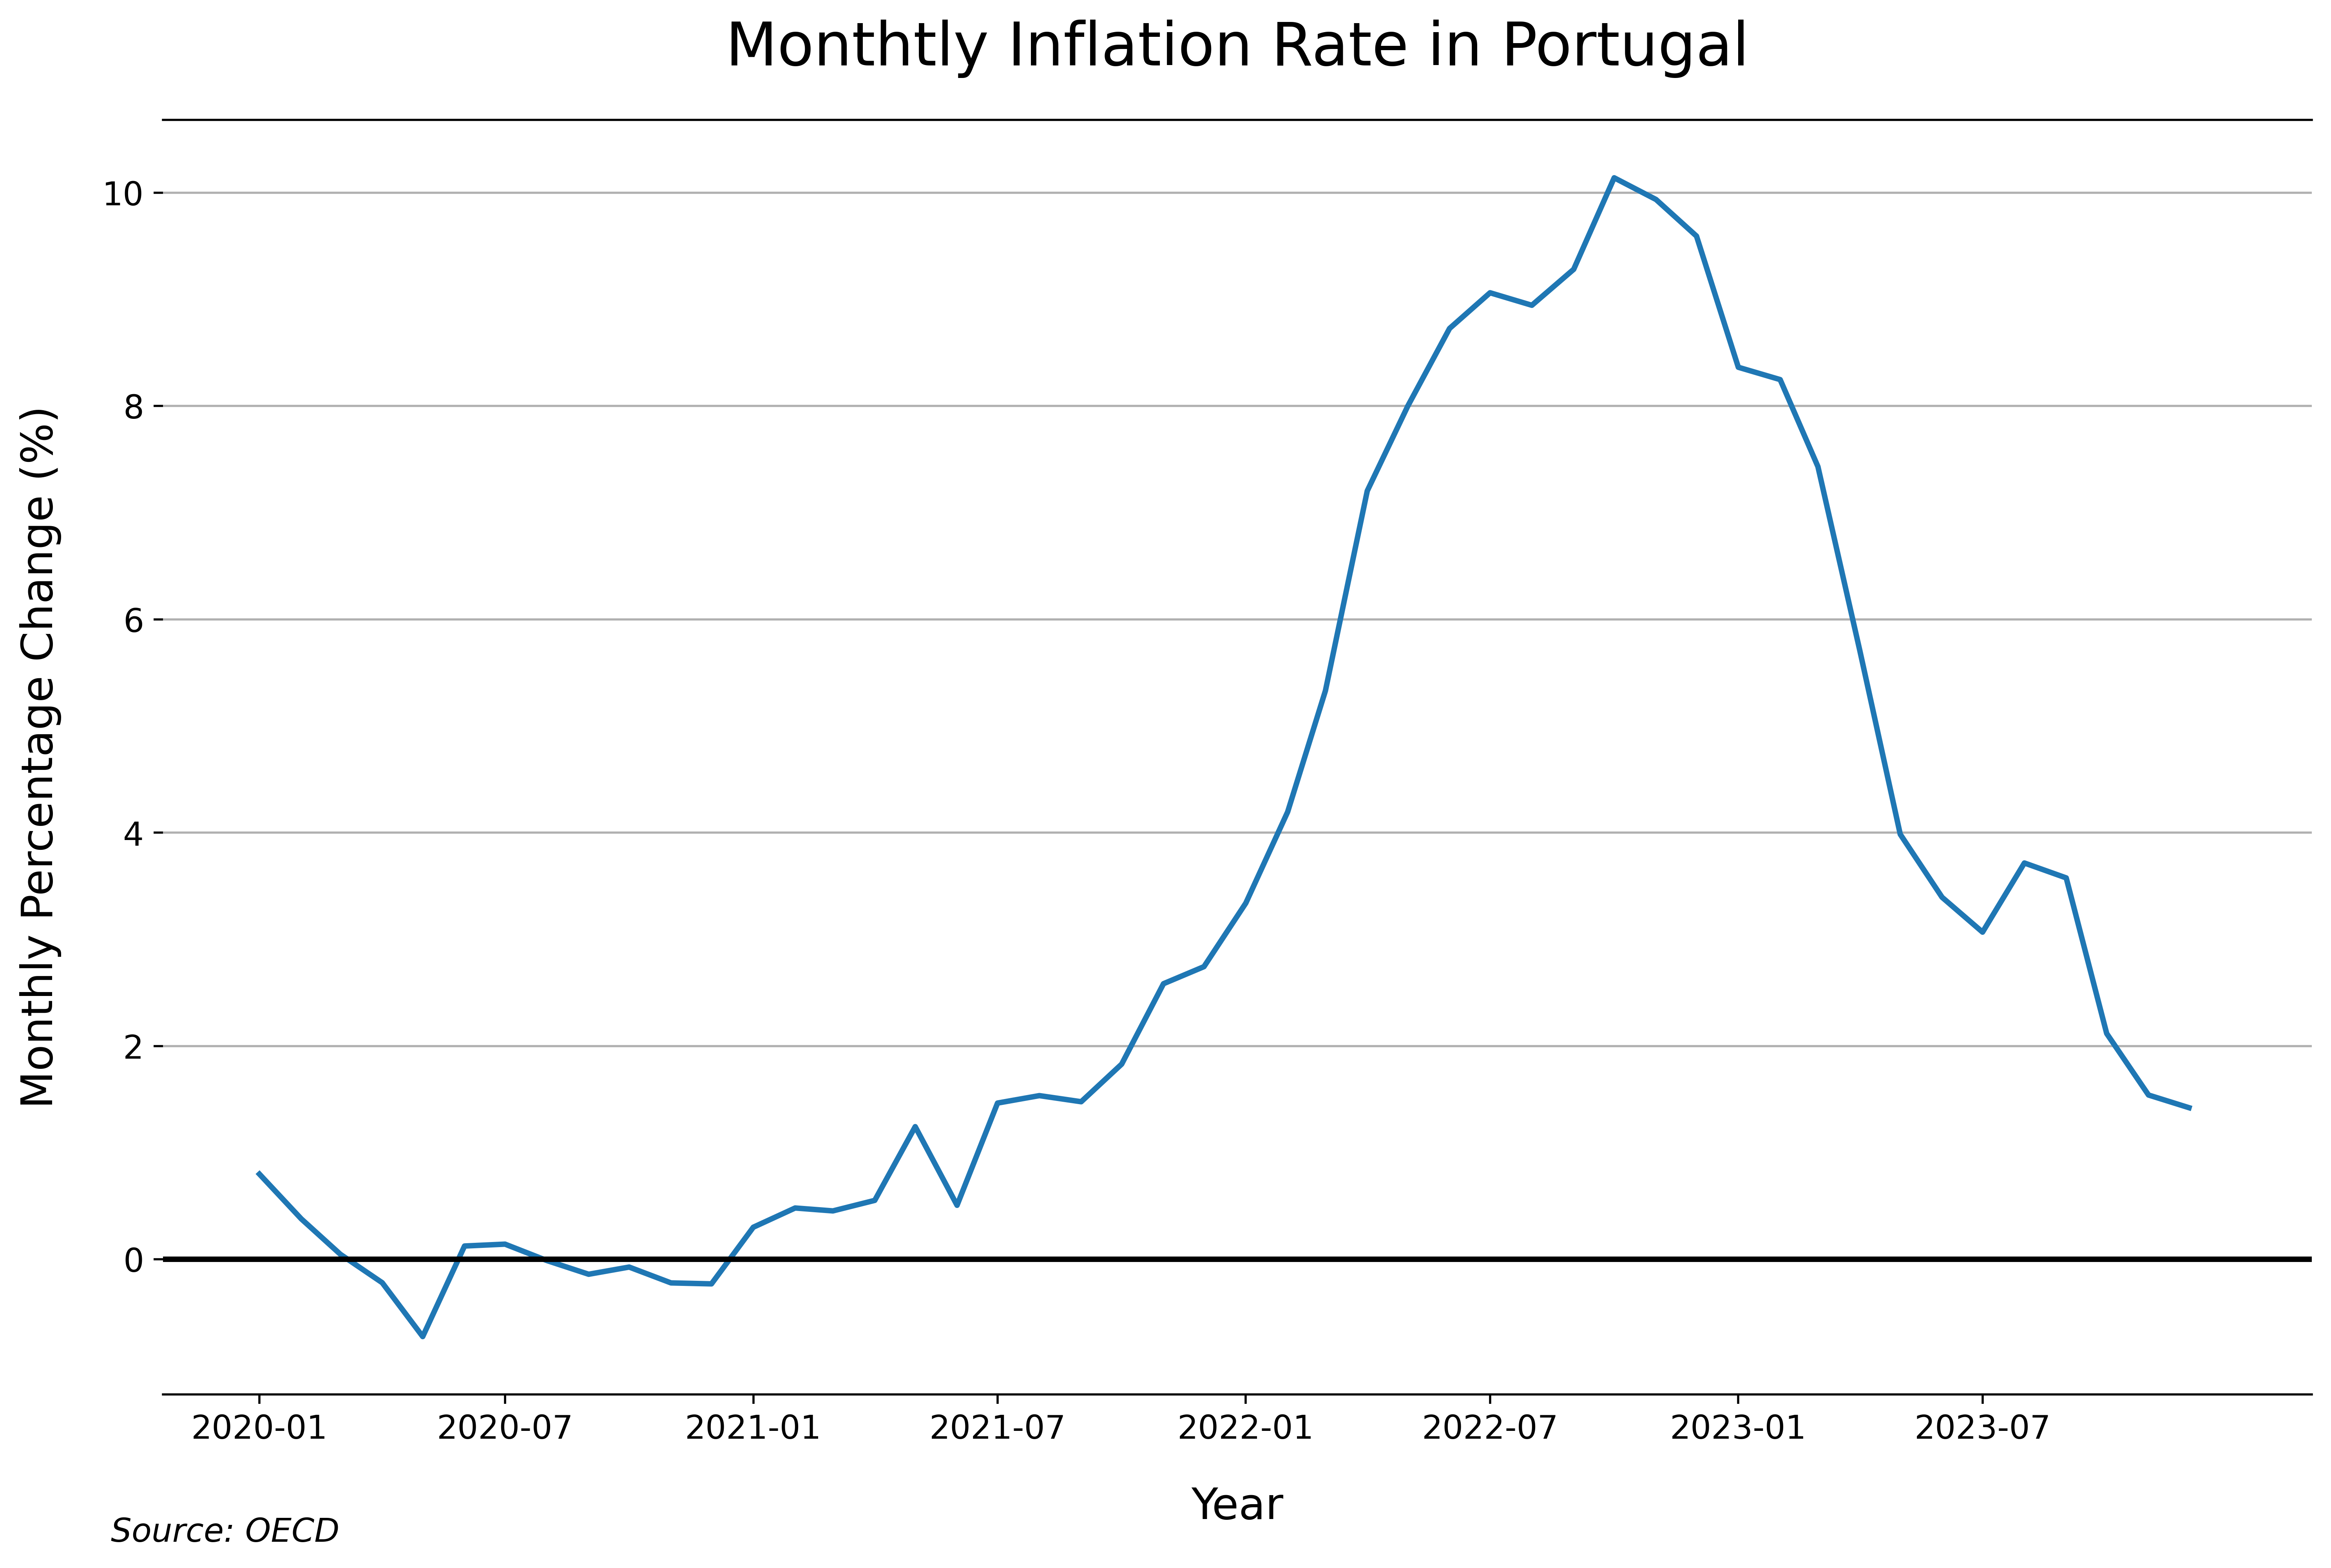

In [327]:
plt.figure(figsize=(12, 8), dpi=500)
plt.plot(inflation_month['DATE'], inflation_month['infl'], linewidth=2)

plt.title('Monthtly Inflation Rate in Portugal', fontsize=22, pad=20, ha='center')
plt.xlabel('Year', fontsize=16, labelpad=15)
plt.ylabel('Monthly Percentage Change (%)', fontsize=16, labelpad=15)

plt.xticks(inflation_month['DATE'][::6], inflation_month['year_month'][::6],ha='center', fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(right=inflation_month['DATE'].iloc[-1] + pd.DateOffset(months=3))

plt.figtext(0.1, 0.01, 'Source: OECD', ha='center', fontsize=12, style='italic')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.axhline(y=0, color='black', linewidth=2)

plt.grid(axis='y')

plt.tight_layout()
plt.show()